# House Price Prediction using Linear, Ridge and Lasso Regression

US housing company Surprise Housing plans to enter the Australian market. They use data analytics to purchase undervalued houses and flip them for profit. To aid their decision-making, they have collected a dataset of Australian house sales. They aim to build a regression model with regularization to predict property values and determine investment viability. Objectives include:

- Identify significant variables impacting house prices.
- Assess the predictive power of the significant variables.

Also, we have to determine the optimal value of lambda for ridge and lasso regression

## Business Goals

A regression model will be developed to predict house prices using available independent variables. This will enable management to analyze price variations, adjust strategies for higher returns, and gain insights into the pricing dynamics of the new market.

## Solution Approach

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [681]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [682]:
# reading the dataset
houses = pd.read_csv("data/train.csv")

In [683]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [684]:
# head
houses.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes.

The target variable: **SalePrice**

In [685]:
def ShowCategoryValueCounts(catName):
    print( "\n ============ \n Categorical Variable: " + catName + "\n ============ \n")
    print(houses[catName].astype('category').value_counts() )

In [686]:
#### Categorical Variables Understanding

# MSSubClass: Identifies the type of dwelling involved in the sale.	

#         20	1-STORY 1946 & NEWER ALL STYLES
#         30	1-STORY 1945 & OLDER
#         40	1-STORY W/FINISHED ATTIC ALL AGES
#         45	1-1/2 STORY - UNFINISHED ALL AGES
#         50	1-1/2 STORY FINISHED ALL AGES
#         60	2-STORY 1946 & NEWER
#         70	2-STORY 1945 & OLDER
#         75	2-1/2 STORY ALL AGES
#         80	SPLIT OR MULTI-LEVEL
#         85	SPLIT FOYER
#         90	DUPLEX - ALL STYLES AND AGES
#        120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
#        150	1-1/2 STORY PUD - ALL AGES
#        160	2-STORY PUD - 1946 & NEWER
#        180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
#        190	2 FAMILY CONVERSION - ALL STYLES AND AGES

# MSZoning: Identifies the general zoning classification of the sale.
		
#        A	Agriculture
#        C	Commercial
#        FV	Floating Village Residential
#        I	Industrial
#        RH	Residential High Density
#        RL	Residential Low Density
#        RP	Residential Low Density Park 
#        RM	Residential Medium Density
	

# Street: Type of road access to property

#        Grvl	Gravel	
#        Pave	Paved
       	
# Alley: Type of alley access to property

#        Grvl	Gravel
#        Pave	Paved
#        NA 	No alley access
		
# LotShape: General shape of property

#        Reg	Regular	
#        IR1	Slightly irregular
#        IR2	Moderately Irregular
#        IR3	Irregular
       
# LandContour: Flatness of the property

#        Lvl	Near Flat/Level	
#        Bnk	Banked - Quick and significant rise from street grade to building
#        HLS	Hillside - Significant slope from side to side
#        Low	Depression
		
# Utilities: Type of utilities available
		
#        AllPub	All public Utilities (E,G,W,& S)	
#        NoSewr	Electricity, Gas, and Water (Septic Tank)
#        NoSeWa	Electricity and Gas Only
#        ELO	Electricity only	
	
# LotConfig: Lot configuration

#        Inside	Inside lot
#        Corner	Corner lot
#        CulDSac	Cul-de-sac
#        FR2	Frontage on 2 sides of property
#        FR3	Frontage on 3 sides of property
	
# LandSlope: Slope of property
		
#        Gtl	Gentle slope
#        Mod	Moderate Slope	
#        Sev	Severe Slope
	
# Neighborhood: Physical locations within Ames city limits

#        Blmngtn	Bloomington Heights
#        Blueste	Bluestem
#        BrDale	Briardale
#        BrkSide	Brookside
#        ClearCr	Clear Creek
#        CollgCr	College Creek
#        Crawfor	Crawford
#        Edwards	Edwards
#        Gilbert	Gilbert
#        IDOTRR	Iowa DOT and Rail Road
#        MeadowV	Meadow Village
#        Mitchel	Mitchell
#        Names	North Ames
#        NoRidge	Northridge
#        NPkVill	Northpark Villa
#        NridgHt	Northridge Heights
#        NWAmes	Northwest Ames
#        OldTown	Old Town
#        SWISU	South & West of Iowa State University
#        Sawyer	Sawyer
#        SawyerW	Sawyer West
#        Somerst	Somerset
#        StoneBr	Stone Brook
#        Timber	Timberland
#        Veenker	Veenker
			
# Condition1: Proximity to various conditions
	
#        Artery	Adjacent to arterial street
#        Feedr	Adjacent to feeder street	
#        Norm	Normal	
#        RRNn	Within 200' of North-South Railroad
#        RRAn	Adjacent to North-South Railroad
#        PosN	Near positive off-site feature--park, greenbelt, etc.
#        PosA	Adjacent to postive off-site feature
#        RRNe	Within 200' of East-West Railroad
#        RRAe	Adjacent to East-West Railroad
	
# Condition2: Proximity to various conditions (if more than one is present)
		
#        Artery	Adjacent to arterial street
#        Feedr	Adjacent to feeder street	
#        Norm	Normal	
#        RRNn	Within 200' of North-South Railroad
#        RRAn	Adjacent to North-South Railroad
#        PosN	Near positive off-site feature--park, greenbelt, etc.
#        PosA	Adjacent to postive off-site feature
#        RRNe	Within 200' of East-West Railroad
#        RRAe	Adjacent to East-West Railroad
	
# BldgType: Type of dwelling
		
#        1Fam	Single-family Detached	
#        2FmCon	Two-family Conversion; originally built as one-family dwelling
#        Duplx	Duplex
#        TwnhsE	Townhouse End Unit
#        TwnhsI	Townhouse Inside Unit
	
# HouseStyle: Style of dwelling
	
#        1Story	One story
#        1.5Fin	One and one-half story: 2nd level finished
#        1.5Unf	One and one-half story: 2nd level unfinished
#        2Story	Two story
#        2.5Fin	Two and one-half story: 2nd level finished
#        2.5Unf	Two and one-half story: 2nd level unfinished
#        SFoyer	Split Foyer
#        SLvl	Split Level
	
# OverallQual: Rates the overall material and finish of the house

#        10	Very Excellent
#        9	Excellent
#        8	Very Good
#        7	Good
#        6	Above Average
#        5	Average
#        4	Below Average
#        3	Fair
#        2	Poor
#        1	Very Poor
	
# OverallCond: Rates the overall condition of the house

#        10	Very Excellent
#        9	Excellent
#        8	Very Good
#        7	Good
#        6	Above Average	
#        5	Average
#        4	Below Average	
#        3	Fair
#        2	Poor
#        1	Very Poor

# RoofStyle: Type of roof

#        Flat	Flat
#        Gable	Gable
#        Gambrel	Gabrel (Barn)
#        Hip	Hip
#        Mansard	Mansard
#        Shed	Shed
		
# RoofMatl: Roof material

#        ClyTile	Clay or Tile
#        CompShg	Standard (Composite) Shingle
#        Membran	Membrane
#        Metal	Metal
#        Roll	Roll
#        Tar&Grv	Gravel & Tar
#        WdShake	Wood Shakes
#        WdShngl	Wood Shingles
		
# Exterior1st: Exterior covering on house

#        AsbShng	Asbestos Shingles
#        AsphShn	Asphalt Shingles
#        BrkComm	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        CemntBd	Cement Board
#        HdBoard	Hard Board
#        ImStucc	Imitation Stucco
#        MetalSd	Metal Siding
#        Other	Other
#        Plywood	Plywood
#        PreCast	PreCast	
#        Stone	Stone
#        Stucco	Stucco
#        VinylSd	Vinyl Siding
#        Wd Sdng	Wood Siding
#        WdShing	Wood Shingles
	
# Exterior2nd: Exterior covering on house (if more than one material)

#        AsbShng	Asbestos Shingles
#        AsphShn	Asphalt Shingles
#        BrkComm	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        CemntBd	Cement Board
#        HdBoard	Hard Board
#        ImStucc	Imitation Stucco
#        MetalSd	Metal Siding
#        Other	Other
#        Plywood	Plywood
#        PreCast	PreCast
#        Stone	Stone
#        Stucco	Stucco
#        VinylSd	Vinyl Siding
#        Wd Sdng	Wood Siding
#        WdShing	Wood Shingles
	
# MasVnrType: Masonry veneer type

#        BrkCmn	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        None	None
#        Stone	Stone
       
# ExterQual: Evaluates the quality of the material on the exterior 
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
		
# ExterCond: Evaluates the present condition of the material on the exterior
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
		
# Foundation: Type of foundation
		
#        BrkTil	Brick & Tile
#        CBlock	Cinder Block
#        PConc	Poured Contrete	
#        Slab	Slab
#        Stone	Stone
#        Wood	Wood
		
# BsmtQual: Evaluates the height of the basement

#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement
		
# BsmtCond: Evaluates the general condition of the basement

#        Ex	Excellent
#        Gd	Good
#        TA	Typical - slight dampness allowed
#        Fa	Fair - dampness or some cracking or settling
#        Po	Poor - Severe cracking, settling, or wetness
#        NA	No Basement
	
# BsmtExposure: Refers to walkout or garden level walls

#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
#        NA	No Basement
	
# BsmtFinType1: Rating of basement finished area

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

# BsmtFinType2: Rating of basement finished area (if multiple types)

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

# Heating: Type of heating
		
#        Floor	Floor Furnace
#        GasA	Gas forced warm air furnace
#        GasW	Gas hot water or steam heat
#        Grav	Gravity furnace	
#        OthW	Hot water or steam heat other than gas
#        Wall	Wall furnace
		
# HeatingQC: Heating quality and condition

#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor
		
# CentralAir: Central air conditioning

#        N	No
#        Y	Yes
		
# Electrical: Electrical system

#        SBrkr	Standard Circuit Breakers & Romex
#        FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
#        FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
#        FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
#        Mix	Mixed
       
# KitchenQual: Kitchen quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor

# Functional: Home functionality (Assume typical unless deductions are warranted)

#        Typ	Typical Functionality
#        Min1	Minor Deductions 1
#        Min2	Minor Deductions 2
#        Mod	Moderate Deductions
#        Maj1	Major Deductions 1
#        Maj2	Major Deductions 2
#        Sev	Severely Damaged
#        Sal	Salvage only

# FireplaceQu: Fireplace quality

#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace
		
# GarageType: Garage location
		
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
#        NA	No Garage
       
# GarageFinish: Interior finish of the garage

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage
       
# GarageQual: Garage quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage
		
# GarageCond: Garage condition

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage
		
# PavedDrive: Paved driveway

#        Y	Paved 
#        P	Partial Pavement
#        N	Dirt/Gravel
		
# PoolQC: Pool quality
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        NA	No Pool
		
# Fence: Fence quality
		
#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence
	
# MiscFeature: Miscellaneous feature not covered in other categories
		
#        Elev	Elevator
#        Gar2	2nd Garage (if not described in garage section)
#        Othr	Other
#        Shed	Shed (over 100 SF)
#        TenC	Tennis Court
#        NA	None
       
# SaleType: Type of sale
		
#        WD 	Warranty Deed - Conventional
#        CWD	Warranty Deed - Cash
#        VWD	Warranty Deed - VA Loan
#        New	Home just constructed and sold
#        COD	Court Officer Deed/Estate
#        Con	Contract 15% Down payment regular terms
#        ConLw	Contract Low Down payment and low interest
#        ConLI	Contract Low Interest
#        ConLD	Contract Low Down
#        Oth	Other
		
# SaleCondition: Condition of sale

#        Normal	Normal Sale
#        Abnorml	Abnormal Sale -  trade, foreclosure, short sale
#        AdjLand	Adjoining Land Purchase
#        Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
#        Family	Sale between family members
#        Partial	Home was not completed when last assessed (associated with New Homes)

categorical_vars =[ 'MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']

In [687]:
# View the categorical variables

for cat in categorical_vars:
    ShowCategoryValueCounts(cat)


 Categorical Variable: MSSubClass

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

 Categorical Variable: MSZoning

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 Categorical Variable: Street

Pave    1454
Grvl       6
Name: Street, dtype: int64

 Categorical Variable: Alley

Grvl    50
Pave    41
Name: Alley, dtype: int64

 Categorical Variable: LotShape

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

 Categorical Variable: LandContour

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

 Categorical Variable: Utilities

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

 Categorical Variable: LotConfig

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int

#### Year/Month Variables Understanding

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

GarageYrBlt: Year garage was built


For data understanding we will treat **Year and month** as categorical variables, however these are **ordinal** data and needs to be used to calculate **AGE** derived columns

In [688]:
yearandmonthvars = ['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd' , 'GarageYrBlt' ]

In [689]:
# View the year and month variables

for cat in yearandmonthvars:
    ShowCategoryValueCounts(cat)


 Categorical Variable: MoSold

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

 Categorical Variable: YrSold

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

 Categorical Variable: YearBuilt

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
1954    24
2000    24
1958    24
1965    24
1970    24
2008    23
1972    23
2002    23
1968    22
1971    22
2001    20
1957    20
1950    20
1962    19
1994    19
2009    18
1940    18
1995    18
1966    18
1960    17
1910    17
1993    17
1967    16
1978    16
1963    16
1955    16
1925    16
1964    15
1996    15
1941    15
1948    14
1969    14
1997    14
1961    14
1956    14
1992    13
1953    12
1949    12
1990    12
1988    11
1973    11
1974    10
1915    10
1980    10
1900    10
1984     9
1979     9
1926     9
1936     9
1930   

In [690]:
#numerical vars
tempList= ['Id'] + categorical_vars + yearandmonthvars
numerical_vars = list(set(houses.columns).difference(tempList))
numerical_vars


['BedroomAbvGr',
 'GarageCars',
 'HalfBath',
 '3SsnPorch',
 'LotArea',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'Fireplaces',
 'TotRmsAbvGrd',
 'SalePrice',
 'FullBath',
 '1stFlrSF',
 'MasVnrArea',
 'LotFrontage',
 'GarageArea',
 '2ndFlrSF',
 'WoodDeckSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtFinSF1',
 'EnclosedPorch',
 'PoolArea',
 'OpenPorchSF',
 'TotalBsmtSF',
 'MiscVal',
 'ScreenPorch',
 'KitchenAbvGr',
 'BsmtUnfSF']

In [691]:
def PlotDistForNumericalVar(numericVar):
    sns.distplot(houses[numericVar])
    plt.show()

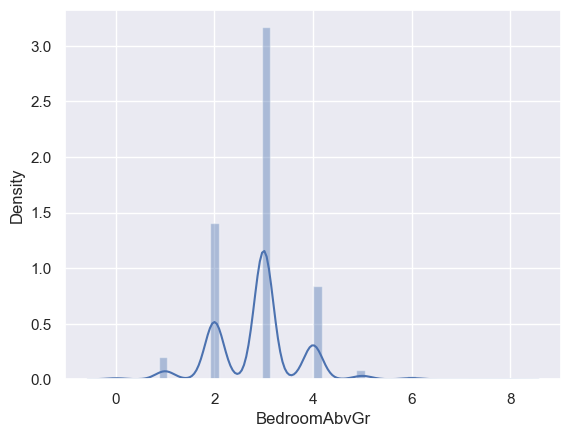

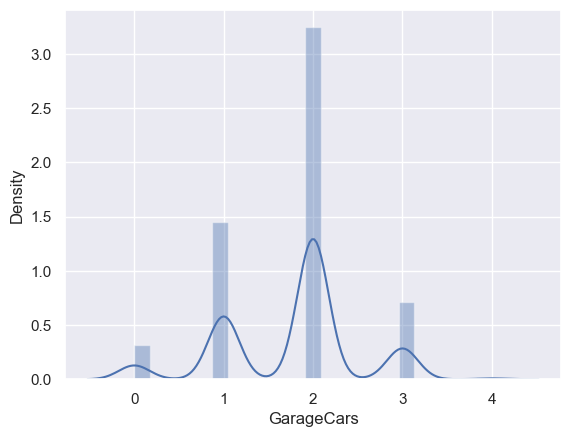

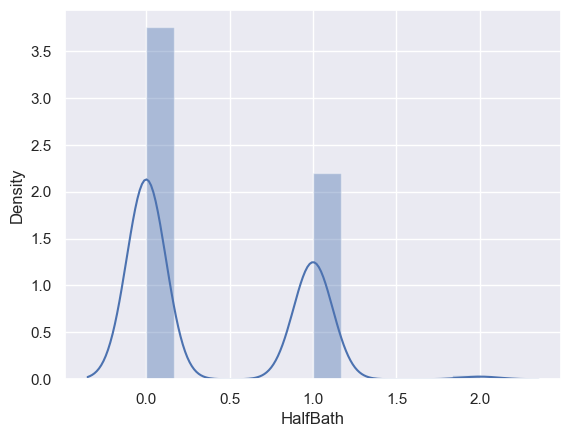

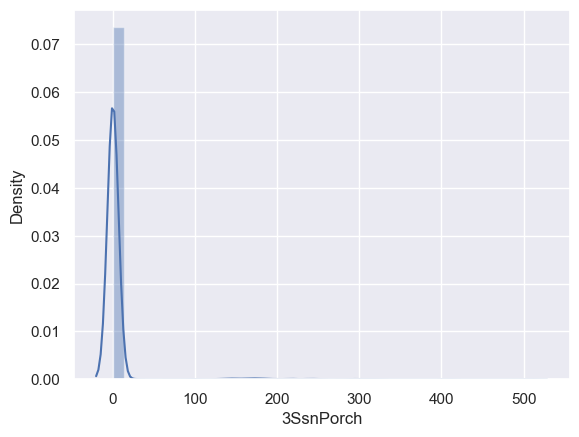

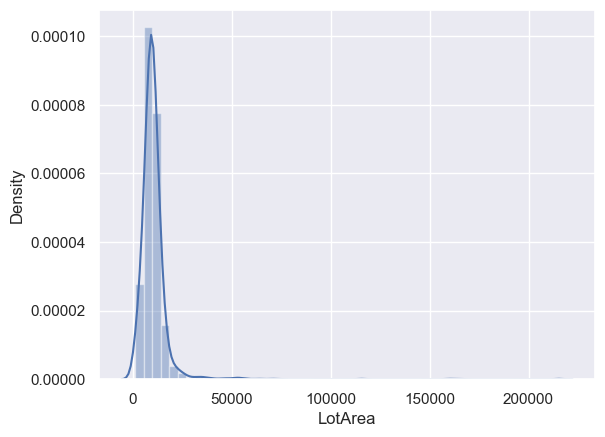

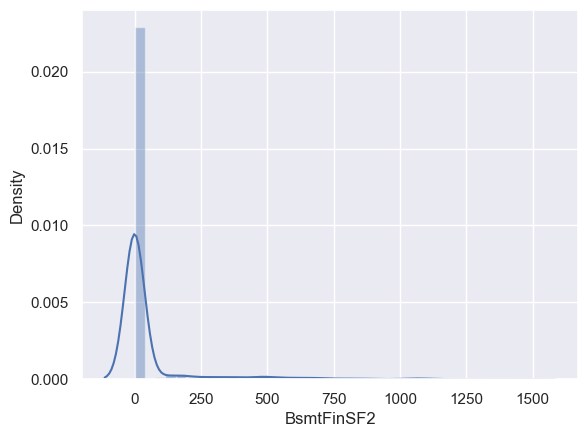

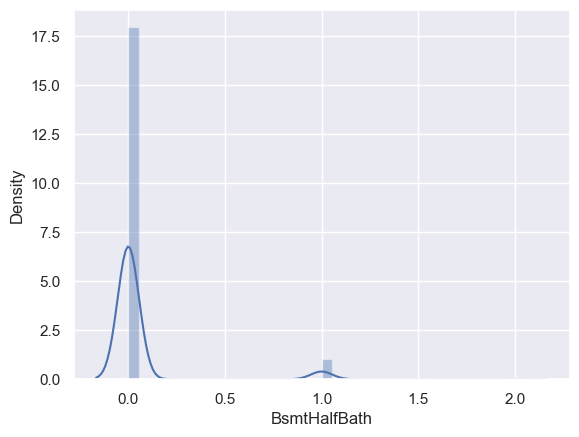

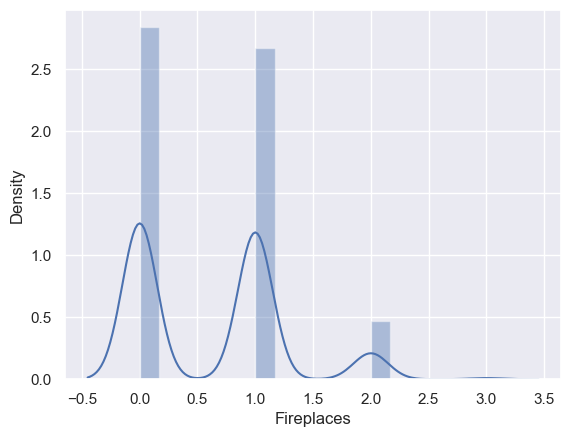

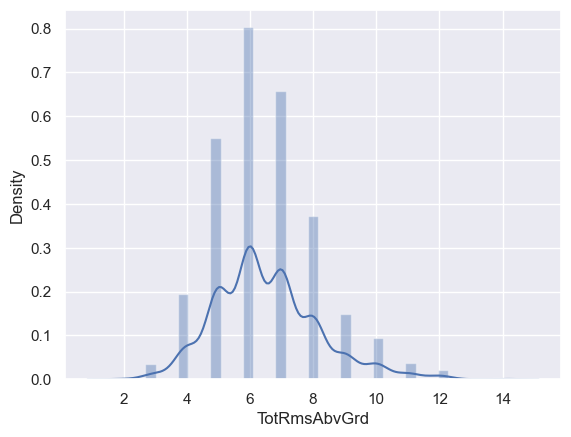

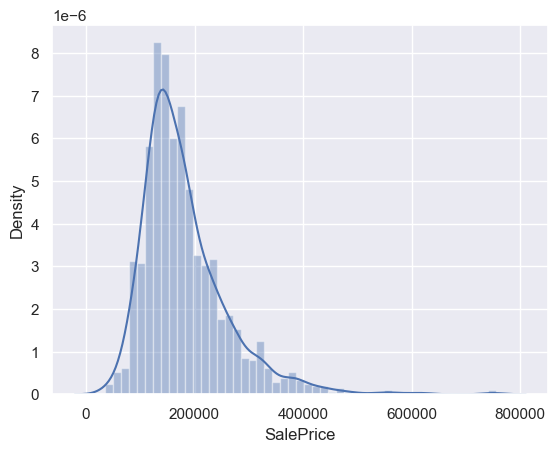

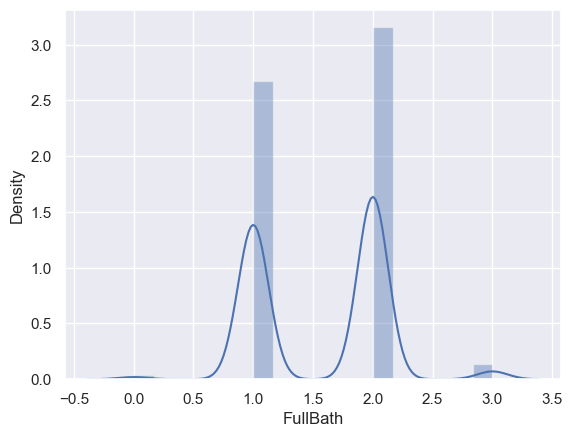

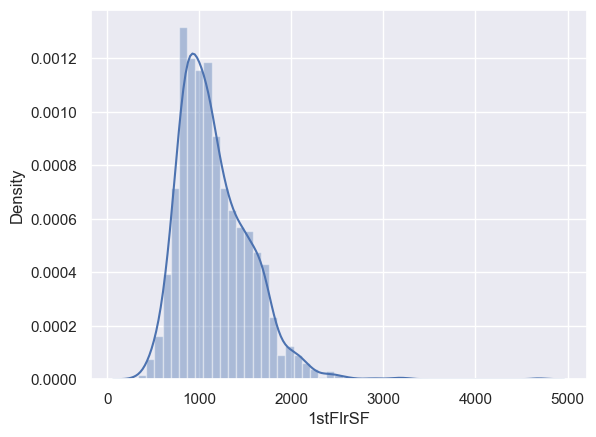

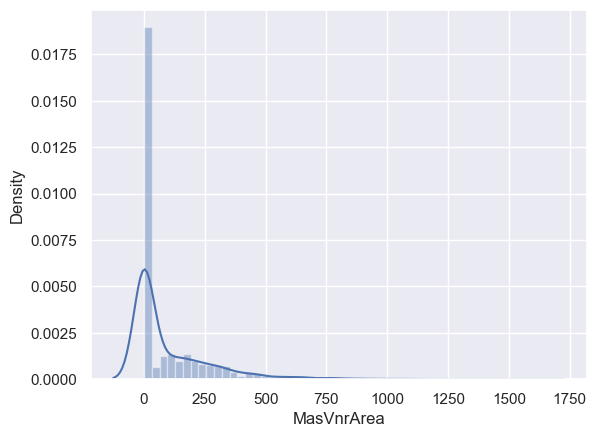

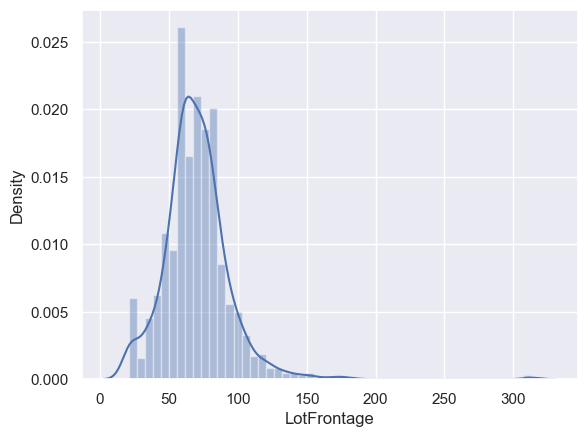

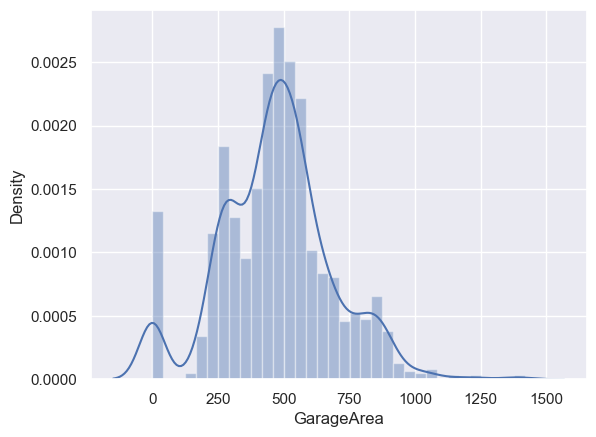

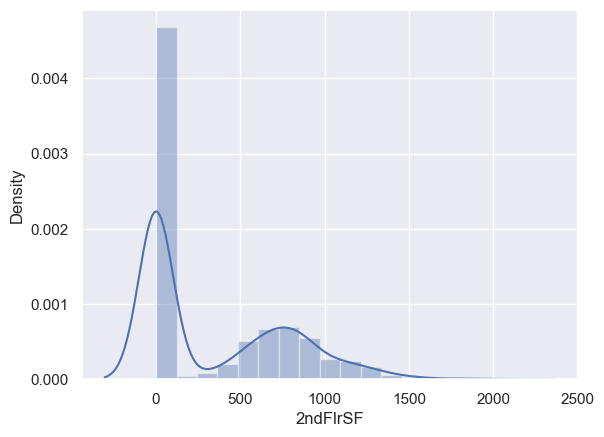

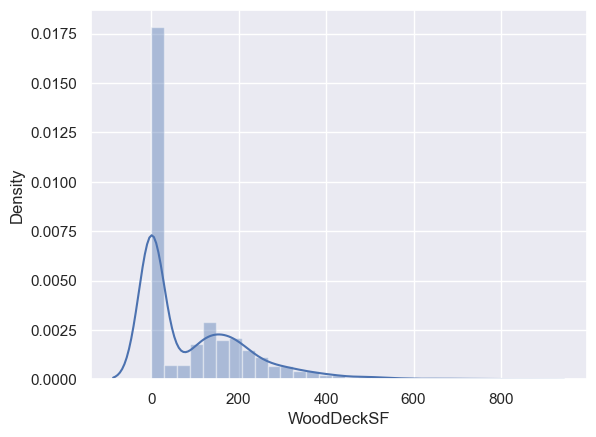

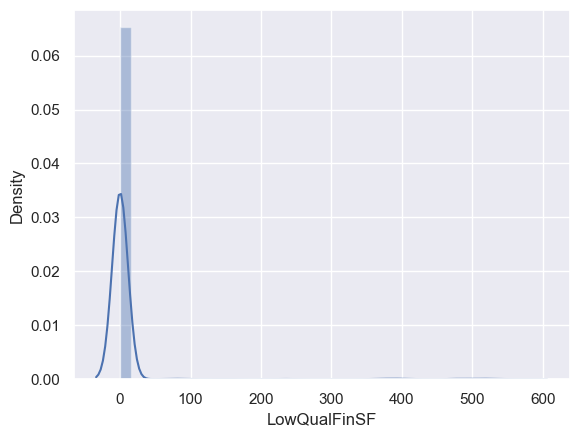

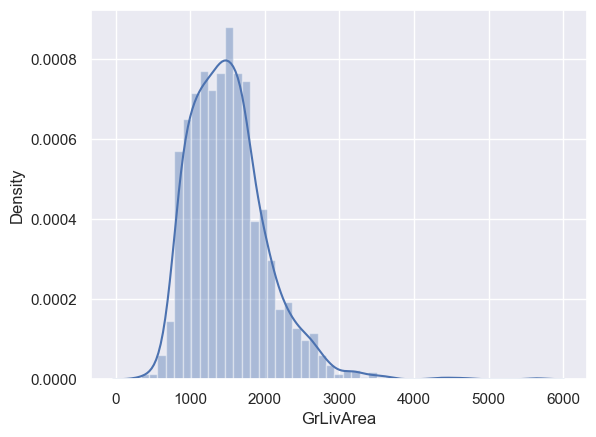

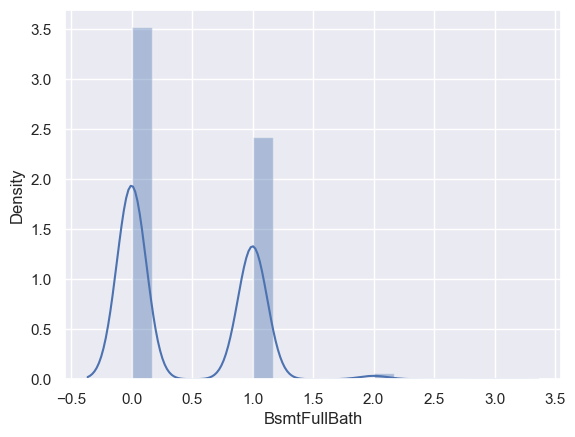

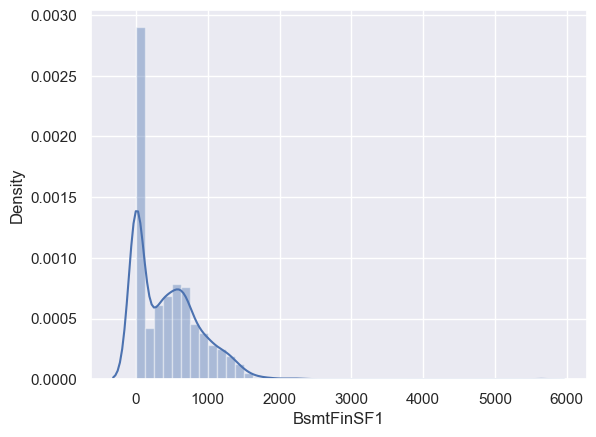

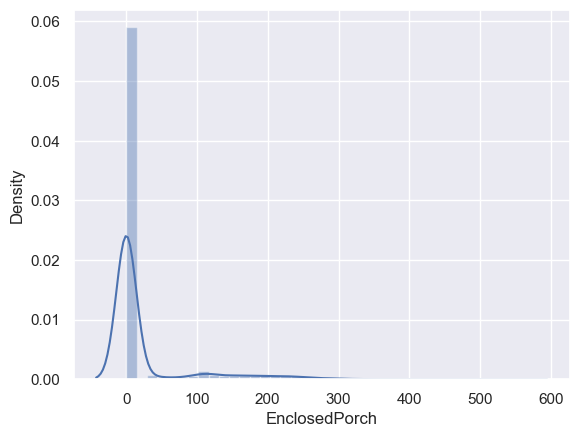

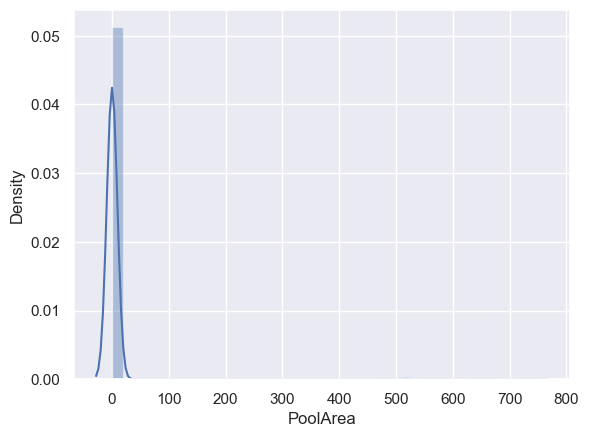

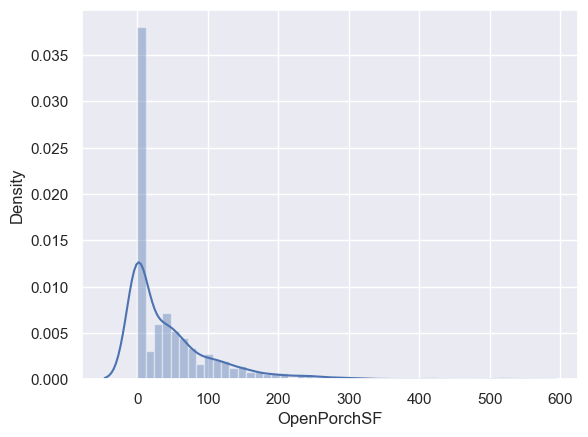

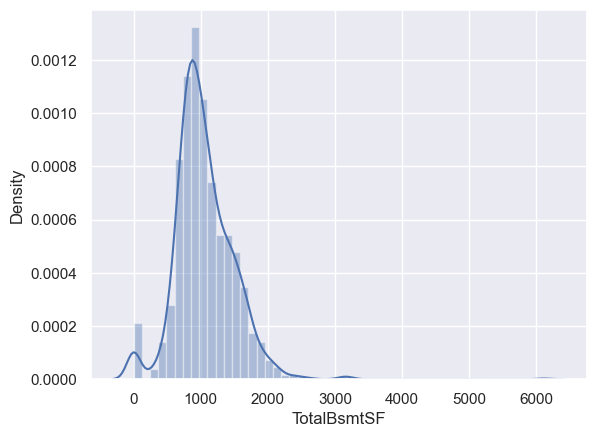

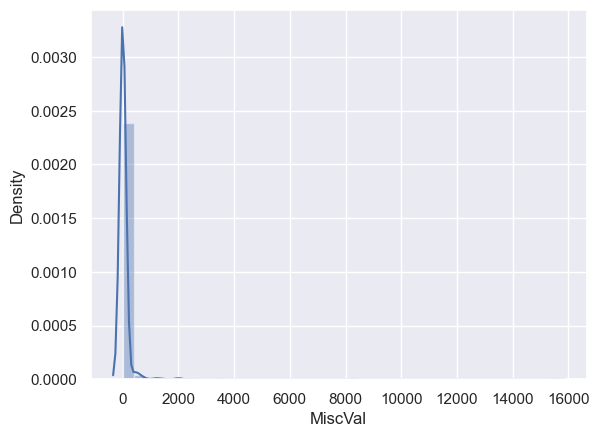

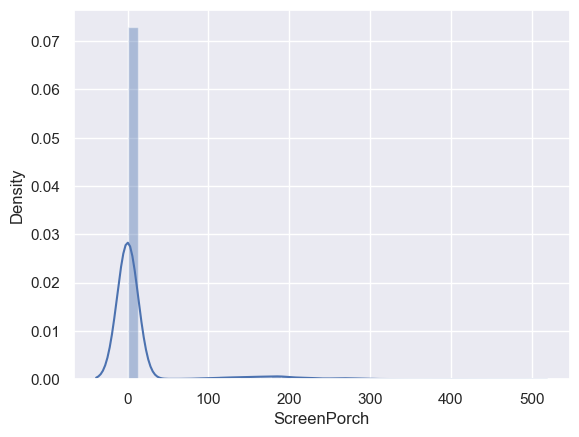

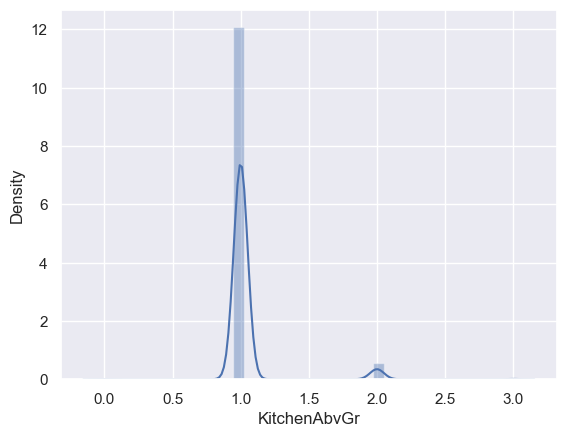

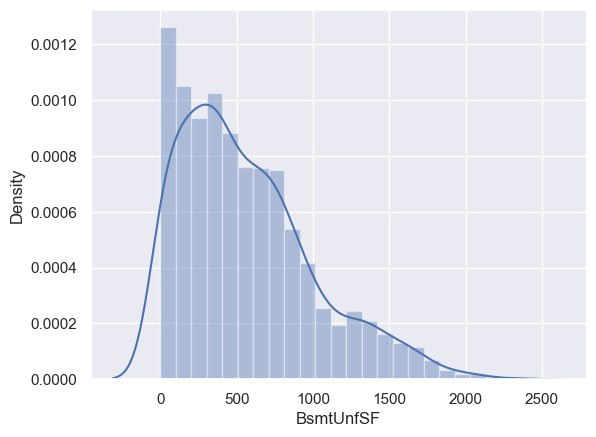

In [692]:
for numvar in numerical_vars:
    PlotDistForNumericalVar(numvar)

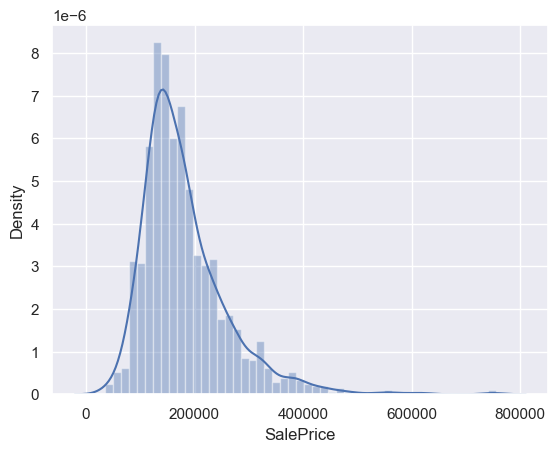

In [693]:
# target variable: price of house
PlotDistForNumericalVar('SalePrice')


#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [694]:
# all numeric (float and int) variables in the dataset
houses_numeric = houses[(numerical_vars)]
houses_numeric.head()

BedroomAbvGr  GarageCars  HalfBath  3SsnPorch  LotArea  BsmtFinSF2  \
0             3           2         1          0     8450           0   
1             3           2         0          0     9600           0   
2             3           2         1          0    11250           0   
3             3           3         0          0     9550           0   
4             4           3         1          0    14260           0   

   BsmtHalfBath  Fireplaces  TotRmsAbvGrd  SalePrice  ...  BsmtFullBath  \
0             0           0             8     208500  ...             1   
1             1           1             6     181500  ...             0   
2             0           1             6     223500  ...             1   
3             0           1             7     140000  ...             1   
4             0           1             9     250000  ...             1   

   BsmtFinSF1  EnclosedPorch  PoolArea  OpenPorchSF  TotalBsmtSF  MiscVal  \
0         706              0         0           61          856        0   
1         978              0         0            0         1262        0   
2         486              0         0           42          920        0   
3         216            272         0           35          756        0   
4         655              0         0           84         1145        0   

   ScreenPorch  KitchenAbvGr  BsmtUnfSF  
0            0             1        150  
1            0             1        284  
2            0             1        434  
3            0             1        540  
4            0             1        490  

[5 rows x 29 columns]

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [695]:
# correlation matrix
cor = houses_numeric.corr()
cor

BedroomAbvGr  GarageCars  HalfBath  3SsnPorch   LotArea  \
BedroomAbvGr       1.000000    0.086106  0.226651  -0.024478  0.119690   
GarageCars         0.086106    1.000000  0.219178   0.035765  0.154871   
HalfBath           0.226651    0.219178  1.000000  -0.004972  0.014259   
3SsnPorch         -0.024478    0.035765 -0.004972   1.000000  0.020423   
LotArea            0.119690    0.154871  0.014259   0.020423  1.000000   
BsmtFinSF2        -0.015728   -0.038264 -0.032148  -0.029993  0.111170   
BsmtHalfBath       0.046519   -0.020891 -0.012340   0.035114  0.048046   
Fireplaces         0.107570    0.300789  0.203649   0.011257  0.271364   
TotRmsAbvGrd       0.676620    0.362289  0.343415  -0.006683  0.190015   
SalePrice          0.168213    0.640409  0.284108   0.044584  0.263843   
FullBath           0.363252    0.469672  0.136381   0.035353  0.126031   
1stFlrSF           0.127401    0.439317 -0.119916   0.056104  0.299475   
MasVnrArea         0.102821    0.364204  0.201444   0.018796  0.104160   
LotFrontage        0.263170    0.285691  0.053532   0.070029  0.426095   
GarageArea         0.065253    0.882475  0.163549   0.035087  0.180403   
2ndFlrSF           0.502901    0.183926  0.609707  -0.024358  0.050986   
WoodDeckSF         0.046854    0.226342  0.108080  -0.032771  0.171698   
LowQualFinSF       0.105607   -0.094480 -0.027080  -0.004296  0.004779   
GrLivArea          0.521270    0.467247  0.415772   0.020643  0.263116   
BsmtFullBath      -0.150673    0.131881 -0.030905  -0.000106  0.158155   
BsmtFinSF1        -0.107355    0.224054  0.004262   0.026451  0.214103   
EnclosedPorch      0.041570   -0.151434 -0.095317  -0.037305 -0.018340   
PoolArea           0.070703    0.020934  0.022381  -0.007992  0.077672   
OpenPorchSF        0.093810    0.213569  0.199740  -0.005842  0.084774   
TotalBsmtSF        0.050450    0.434585 -0.048804   0.037384  0.260833   
MiscVal            0.007767   -0.043080  0.001290   0.000354  0.038068   
ScreenPorch        0.044300    0.050494  0.072426  -0.031436  0.043160   
KitchenAbvGr       0.198597   -0.050634 -0.068263  -0.024600 -0.017784   
BsmtUnfSF          0.166643    0.214175 -0.041118   0.020764 -0.002618   

               BsmtFinSF2  BsmtHalfBath  Fireplaces  TotRmsAbvGrd  SalePrice  \
BedroomAbvGr    -0.015728      0.046519    0.107570      0.676620   0.168213   
GarageCars      -0.038264     -0.020891    0.300789      0.362289   0.640409   
HalfBath        -0.032148     -0.012340    0.203649      0.343415   0.284108   
3SsnPorch       -0.029993      0.035114    0.011257     -0.006683   0.044584   
LotArea          0.111170      0.048046    0.271364      0.190015   0.263843   
BsmtFinSF2       1.000000      0.070948    0.046921     -0.035227  -0.011378   
BsmtHalfBath     0.070948      1.000000    0.028976     -0.023836  -0.016844   
Fireplaces       0.046921      0.028976    1.000000      0.326114   0.466929   
TotRmsAbvGrd    -0.035227     -0.023836    0.326114      1.000000   0.533723   
SalePrice       -0.011378     -0.016844    0.466929      0.533723   1.000000   
FullBath        -0.076444     -0.054536    0.243671      0.554784   0.560664   
1stFlrSF         0.097117      0.001956    0.410531      0.409516   0.605852   
MasVnrArea      -0.072319      0.026673    0.249070      0.280682   0.477493   
LotFrontage      0.049900     -0.007234    0.266639      0.352096   0.351799   
GarageArea      -0.018227     -0.024536    0.269141      0.337822   0.623431   
2ndFlrSF        -0.099260     -0.023855    0.194561      0.616423   0.319334   
WoodDeckSF       0.067898      0.040161    0.200019      0.165984   0.324413   
LowQualFinSF     0.014807     -0.005842   -0.021272      0.131185  -0.025606   
GrLivArea       -0.009640     -0.018918    0.461679      0.825489   0.708624   
BsmtFullBath     0.158678     -0.147871    0.137928     -0.053275   0.227122   
BsmtFinSF1      -0.050117      0.067418    0.260011      0.044316   0.386420   
EnclosedPorch    0.036543     -0.0

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



In [696]:
# variable formats
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [697]:
#checking duplicates
sum(houses.duplicated(subset = 'Id')) == 0

True

In [698]:
# Checking for percentage nulls
round(100*(houses.isnull().sum()/len(houses.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [699]:
# since, it is clear that there are multiple columns with high nulls, lets group them together
houses.columns[houses.isnull().any()] 

nullCols = houses.isnull().sum()/len(houses)*100
nullCols = nullCols[nullCols>0]
nullCols.sort_values(inplace=True, ascending=False)
nullCols

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [700]:
# filling na as none and converting datatype to categorical for all categorical variable
for catvar in categorical_vars:
    if catvar in nullCols.index:
        houses[catvar].fillna("none", inplace=True)
    houses[catvar] = houses[catvar].astype('object')

houses['MoSold'] = houses['MoSold'].astype('object')
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [701]:
#Checking for columns with null value again

houses.columns[houses.isnull().any()] 

nullCols = houses.isnull().sum()/len(houses)*100
nullCols = nullCols[nullCols>0]
nullCols.sort_values(inplace=True, ascending=False)
nullCols

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [702]:
# Impute numeric null vlaues with median

houses['LotFrontage'].fillna(houses["LotFrontage"].median(), inplace=True)
houses["GarageYrBlt"].fillna(houses["GarageYrBlt"].median(), inplace=True)
houses["MasVnrArea"].fillna(houses["MasVnrArea"].median(), inplace=True)

houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

### Next, we need to derive AGE column ```AgeBuilt, AgeRemodelled, GarageAge```. 

In [703]:
# Age
houses['AgeBuilt'] = houses['YrSold'] - houses['YearBuilt']
houses['AgeRemodelled'] = houses['YrSold'] - houses['YearRemodAdd']
houses['GarageAge'] = houses['YrSold'] - houses['GarageYrBlt']
print(houses[['AgeBuilt', 'AgeRemodelled','GarageAge']])

      AgeBuilt  AgeRemodelled  GarageAge
0            5              5        5.0
1           31             31       31.0
2            7              6        7.0
3           91             36        8.0
4            8              8        8.0
5           16             14       16.0
6            3              2        3.0
7           36             36       36.0
8           77             58       77.0
9           69             58       69.0
10          43             43       43.0
11           1              0        1.0
12          46             46       46.0
13           1              0        1.0
14          48             48       48.0
15          78              6       16.0
16          40             40       40.0
17          39             39       39.0
18           4              4        4.0
19          51             44       51.0
20           1              0        1.0
21          77             57       77.0
22           6              6        6.0
23          31  

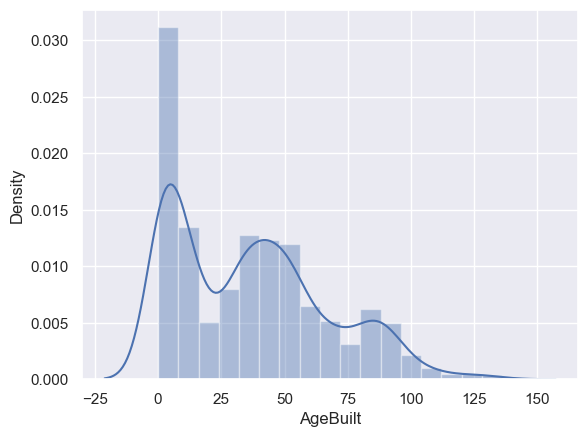

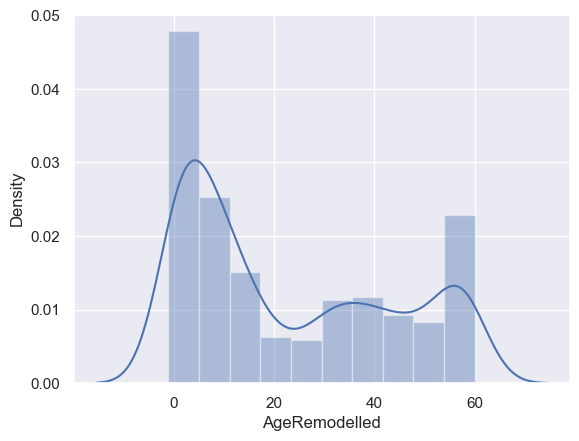

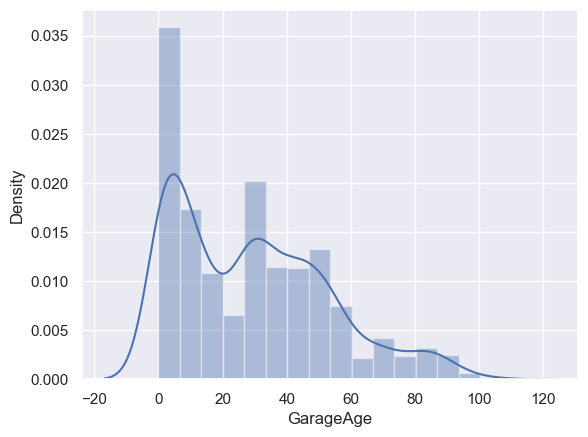

In [704]:
# look at all values
for agevar in ['AgeBuilt', 'AgeRemodelled','GarageAge']:
    PlotDistForNumericalVar(agevar)

In [705]:
# Age of remodelling seems to have a negative value, the data seems incorrect so lets impute with 0
temp = houses[houses["AgeRemodelled"]<0]
temp["AgeRemodelled"] = 0
houses[houses["AgeRemodelled"]<0] = temp

In [706]:
#Drop the columns for YEAR

houses = houses.drop(['YrSold'], axis = 1)
houses = houses.drop(['YearBuilt'], axis = 1)
houses = houses.drop(['YearRemodAdd'], axis = 1)
houses = houses.drop(['GarageYrBlt'], axis = 1)




In [707]:
#Drop Id
houses = houses.drop(['Id'], axis=1)

In [708]:
#Rearrange Column

houses.insert(len(houses.columns)-1, 'SalePrice', houses.pop('SalePrice'))

In [709]:
houses.MoSold = houses.MoSold.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})


In [710]:
houses.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   443.639726    46.549315   
std      22.027677    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  ...   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521  ...   
std     441.866955   438.705324   386.587738   436.528436     48.623081  ...   
min       0.000000     0.000000   334.000000     0.000000      0.000000  ...   
25%     223.000000   795.750000   882.000000     0.000000      0.000000  ...   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000  ...   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000  ...   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000  ...   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.000000   
max     547.000000     552.000000   508.000000   480.000000   738.000000   

            MiscVal     AgeBuilt  AgeRemodelled    GarageAge      SalePrice  
count   1460.000000  1460.000000    1460.000000  1460.000000    1460.000000  
mean      43.489041    36.547945      22.950685    29.226712  180921.195890  
std      496.123024    30.250152      20.639875    24.034844   79442.502883  
min        0.000000     0.000000       0.000000     0.000000   34900.000000  
25%        0.000000     8.000000       4.000000     7.000000  129975.000000  
50%        0.000000    35.000000      14.000000    28.000000  163000.000000  
75%        0.000000    54.000000      41.000000    46.000000  214000.000000  
max    15500.000000   136.000000      60.000000   107.000000  755000.000000  

[8 rows x 32 columns]

## EDA 

In [711]:
#visualizing the categorical columns
# to see how predictor variable stands against the target variable
def GetCategorical(df):
    return df.select_dtypes(exclude=['float64', 'int64'])

houses_categorical =  GetCategorical(houses)
houses_categorical.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  none      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  none      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  none      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  none      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  none      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageFinish GarageQual GarageCond PavedDrive  \
0       Gtl      CollgCr  ...          RFn         TA         TA          Y   
1       Gtl      Veenker  ...          RFn         TA         TA          Y   
2       Gtl      CollgCr  ...          RFn         TA         TA          Y   
3       Gtl      Crawfor  ...          Unf         TA         TA          Y   
4       Gtl      NoRidge  ...          RFn         TA         TA          Y   

  PoolQC Fence MiscFeature MoSold SaleType SaleCondition  
0   none  none        none    feb       WD        Normal  
1   none  none        none    may       WD        Normal  
2   none  none        none   sept       WD        Normal  
3   none  none        none    feb       WD       Abnorml  
4   none  none        none    dec       WD        Normal  

[5 rows x 47 columns]

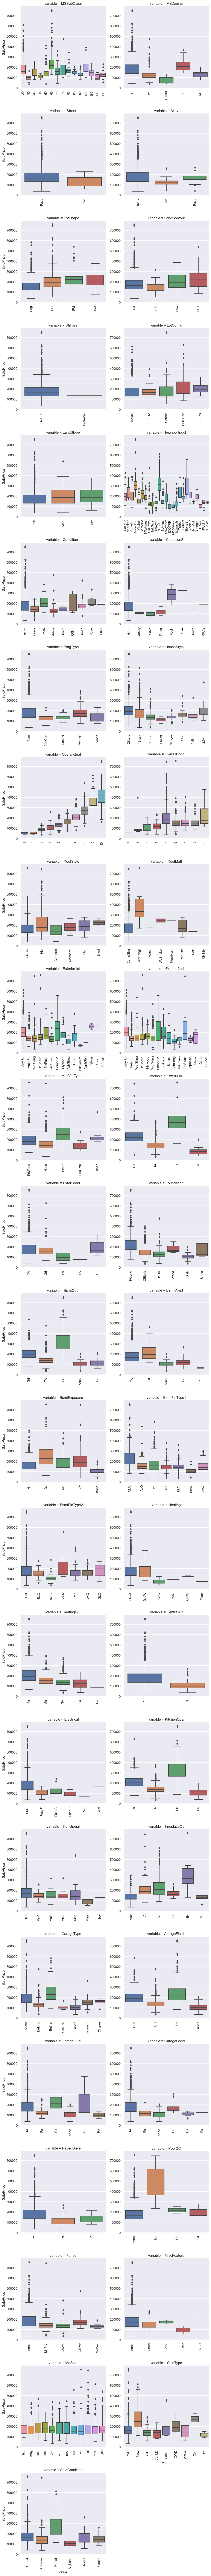

In [712]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(houses, id_vars=['SalePrice'], value_vars=houses_categorical.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

In [713]:
# all numeric (float and int) variables in the dataset
def GetNumerical(df):
    return df.select_dtypes(include=['float64', 'int64'])

houses_numeric = GetNumerical(houses)
houses_numeric.head()


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  OpenPorchSF  \
0          856       856       854             0  ...           61   
1         1262      1262         0             0  ...            0   
2          920       920       866             0  ...           42   
3          756       961       756             0  ...           35   
4         1145      1145      1053             0  ...           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  AgeBuilt  \
0              0          0            0         0        0         5   
1              0          0            0         0        0        31   
2              0          0            0         0        0         7   
3            272          0            0         0        0        91   
4              0          0            0         0        0         8   

   AgeRemodelled  GarageAge  SalePrice  
0              5        5.0     208500  
1             31       31.0     181500  
2              6        7.0     223500  
3             36        8.0     140000  
4              8        8.0     250000  

[5 rows x 32 columns]

In [714]:
# plot the heat map for numerical variables
# correlation matrix
cor = houses_numeric.corr()
cor

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.304522    0.178469    0.214367    0.042463   
LotArea           0.304522  1.000000    0.103321    0.214103    0.111170   
MasVnrArea        0.178469  0.103321    1.000000    0.261256   -0.071330   
BsmtFinSF1        0.214367  0.214103    0.261256    1.000000   -0.050117   
BsmtFinSF2        0.042463  0.111170   -0.071330   -0.050117    1.000000   
BsmtUnfSF         0.124098 -0.002618    0.113862   -0.495251   -0.209294   
TotalBsmtSF       0.363472  0.260833    0.360067    0.522396    0.104810   
1stFlrSF          0.413773  0.299475    0.339850    0.445863    0.097117   
2ndFlrSF          0.072388  0.050986    0.173800   -0.137079   -0.099260   
LowQualFinSF      0.037469  0.004779   -0.068628   -0.064503    0.014807   
GrLivArea         0.368007  0.263116    0.388052    0.208171   -0.009640   
BsmtFullBath      0.090343  0.158155    0.083010    0.649212    0.158678   
BsmtHalfBath     -0.006979  0.048046    0.027403    0.067418    0.070948   
FullBath          0.180534  0.126031    0.272999    0.058543   -0.076444   
HalfBath          0.047222  0.014259    0.199108    0.004262   -0.032148   
BedroomAbvGr      0.236840  0.119690    0.102775   -0.107355   -0.015728   
KitchenAbvGr     -0.004905 -0.017784   -0.038450   -0.081007   -0.040751   
TotRmsAbvGrd      0.320518  0.190015    0.279568    0.044316   -0.035227   
Fireplaces        0.233221  0.271364    0.247015    0.260011    0.046921   
GarageCars        0.269539  0.154871    0.361945    0.224054   -0.038264   
GarageArea        0.323511  0.180403    0.370884    0.296970   -0.018227   
WoodDeckSF        0.075542  0.171698    0.159991    0.204306    0.067898   
OpenPorchSF       0.137014  0.084774    0.122528    0.111761    0.003093   
EnclosedPorch     0.010287 -0.018340   -0.109907   -0.102303    0.036543   
3SsnPorch         0.061945  0.020423    0.019144    0.026451   -0.029993   
ScreenPorch       0.037655  0.043160    0.062248    0.062021    0.088871   
PoolArea          0.180819  0.077672    0.011928    0.140491    0.041709   
MiscVal          -0.000255  0.038068   -0.029512    0.003571    0.004940   
AgeBuilt         -0.116223 -0.014832   -0.311479   -0.248483    0.050422   
AgeRemodelled    -0.082869 -0.014611   -0.176991   -0.127429    0.069807   
GarageAge        -0.062544  0.025036   -0.244519   -0.147755    0.089298   
SalePrice         0.334771  0.263843    0.472614    0.386420   -0.011378   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
LotFrontage     0.124098     0.363472  0.413773  0.072388      0.037469  ...   
LotArea        -0.002618     0.260833  0.299475  0.050986      0.004779  ...   
MasVnrArea      0.113862     0.360067  0.339850  0.173800     -0.068628  ...   
BsmtFinSF1     -0.495251     0.522396  0.445863 -0.137079     -0.064503  ...   
BsmtFinSF2     -0.209294     0.104810  0.097117 -0.099260      0.014807  ...   
BsmtUnfSF       1.000000     0.415360  0.317987  0.004469      0.028167  ...   
TotalBsmtSF     0.415360     1.000000  0.819530 -0.174512     -0.033245  ...   
1stFlrSF        0.317987     0.819530  1.000000 -0.202646     -0.014241  ...   
2ndFlrSF        0.004469    -0.174512 -0.202646  1.000000      0.063353  ...   
LowQualFinSF    0.028167    -0.033245 -0.014241  0.063353      1.000000  ...   
GrLivArea       0.240257     0.454868  0.566024  0.687501      0.134683  ...   
BsmtFullBath   -0.422900     0.307351  0.244671 -0.169494     -0.047143  ...   
BsmtHalfBath   -0.095804    -0.000315  0.001956 -0.023855     -0.005842  ...   
FullBath        0.288886     0.323722  0.380637  0.421378     -0.000710  ...   
HalfBath       -0.041118    -0.048804 -0.119916  0.609707     -0.027080  ...   
BedroomAbvGr    0.166643     0.050450  0.127401  0.502901      0.105607  ...   
KitchenAbvGr    0.030086    -0.068901  0.068101  0.059306      0.007522  ...   
TotRmsAbvGrd    0.250647     0.285573  0.409516  0.616423      0.1

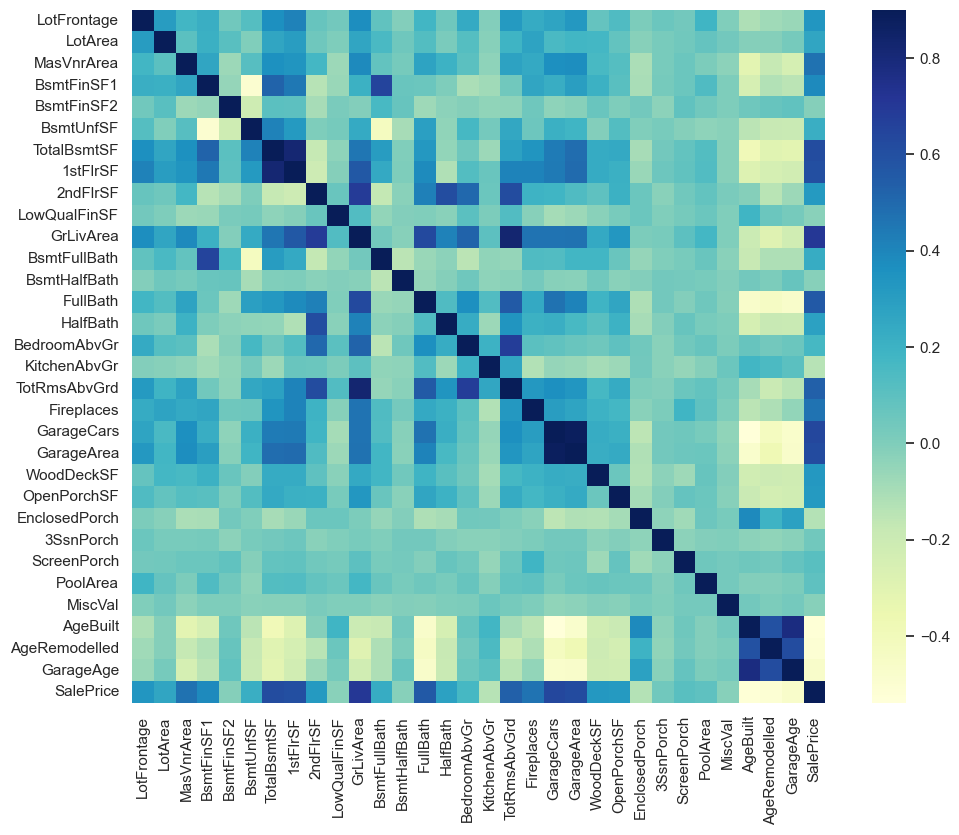

In [715]:
# plotting correlations on a heatmap

plt.subplots(figsize=(12,9))
sns.heatmap(cor, vmax=0.9, square=True, cmap="YlGnBu")
plt.show()


The heatmap shows some useful insights:

Correlation of Saleprice with independent variables:
- Price is highly (positively) correlated with ```TotalBasementSF, 1stFlrSF, Fullbath, TotRmsAbvGrd, GrLivArea, GarageCars, GarageArea``` 
- Price is negatively correlated to ```AgeBuilt``` , ```AgeRemodelled``` and ```GarageAge```. This suggest older the house the negative impact on price.

Correlation among independent variables:
- Many independent variables are highly correlated (look at the bottom-right part of matrix): ```AgeBuilt``` , ```AgeRemodelled``` , ```GarageAge``` , ```TotRmsAbvGrd```,  ```GrLivArea``` etc. are all measures and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

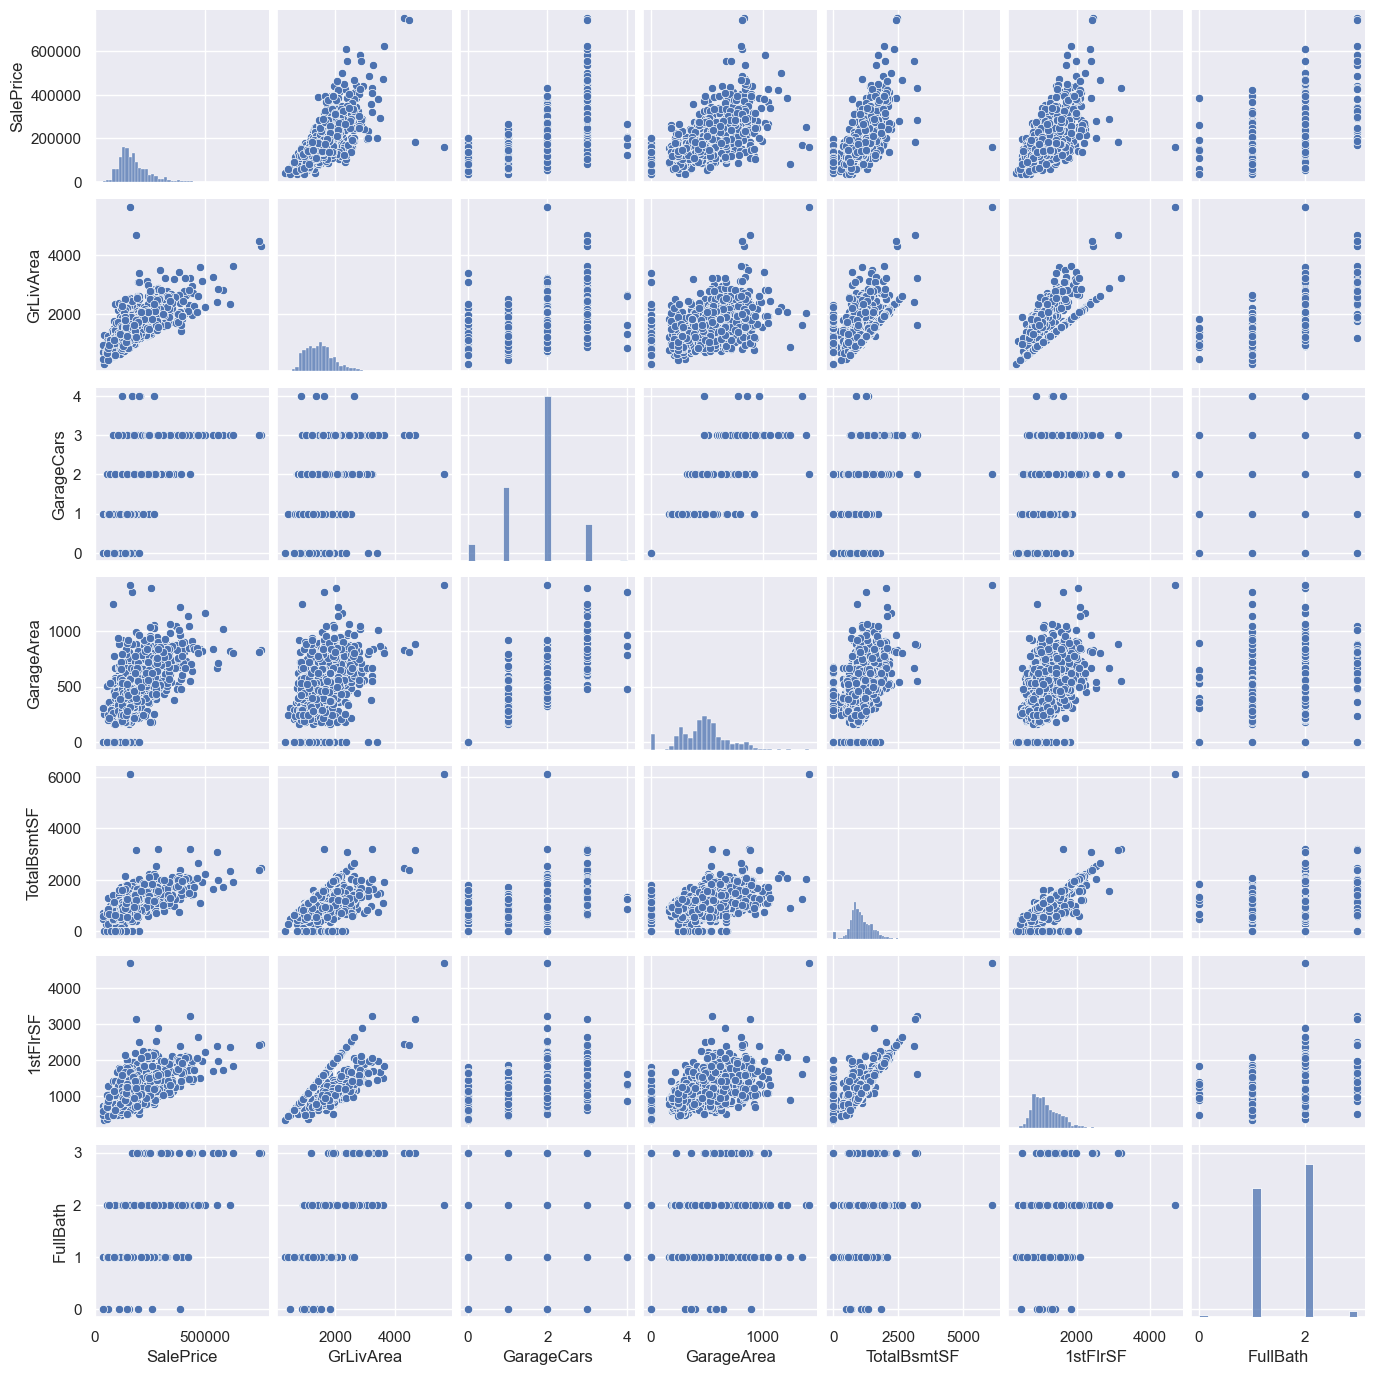

In [716]:
# chart that the top 10 variables
sns.set()
 
sns.pairplot(houses_numeric[cor.nlargest(7, 'SalePrice')['SalePrice'].index],height = 2)
plt.show()

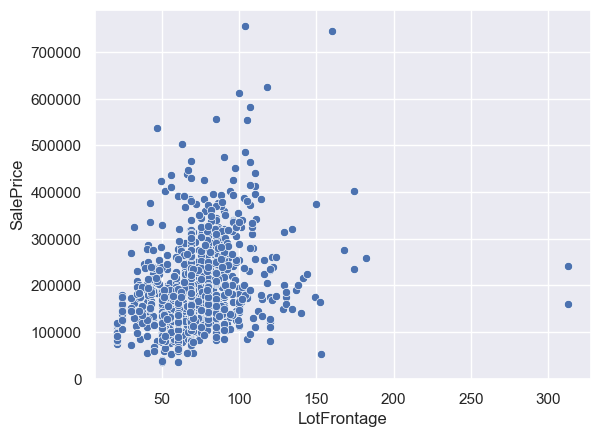

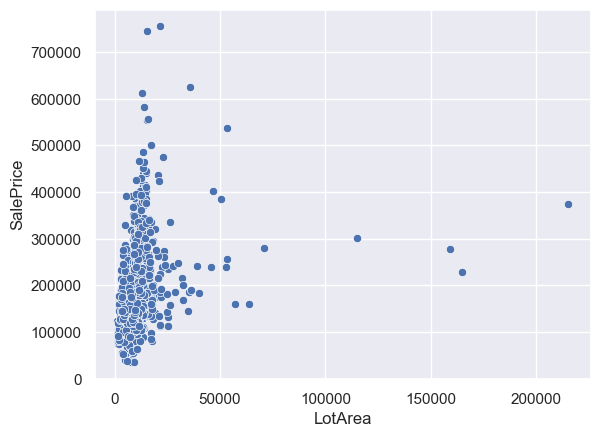

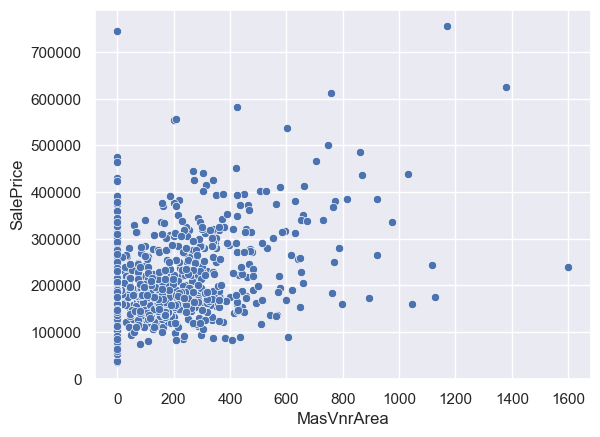

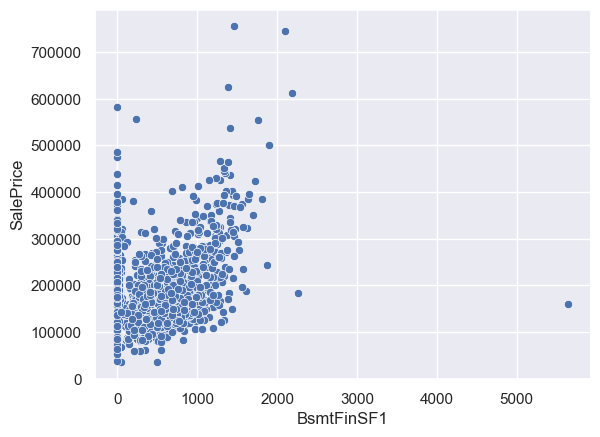

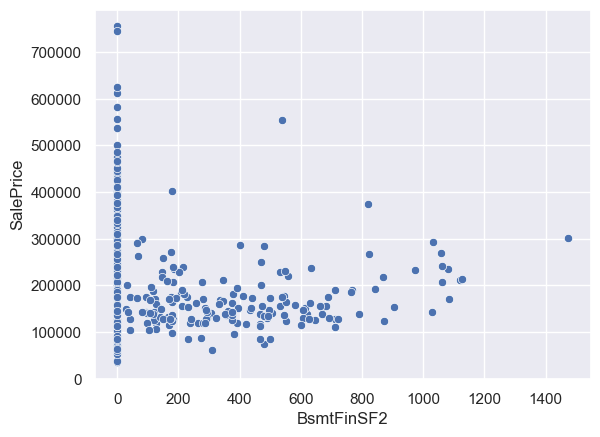

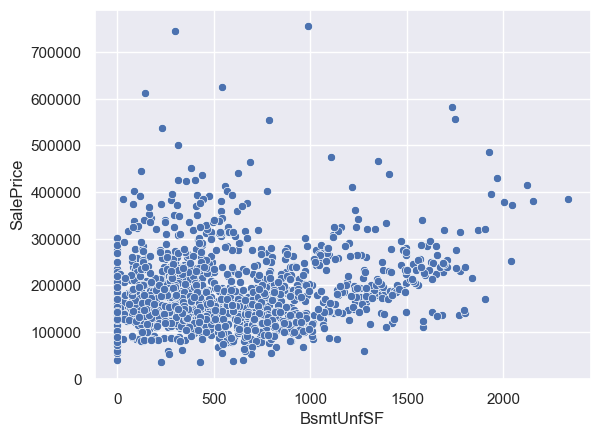

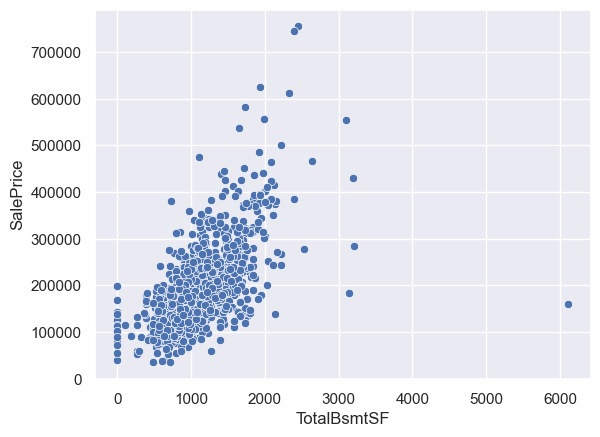

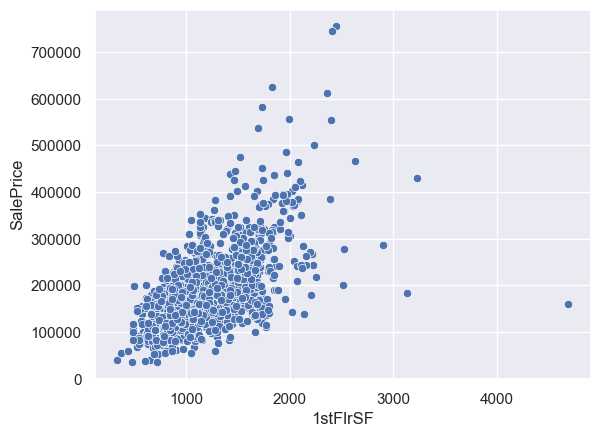

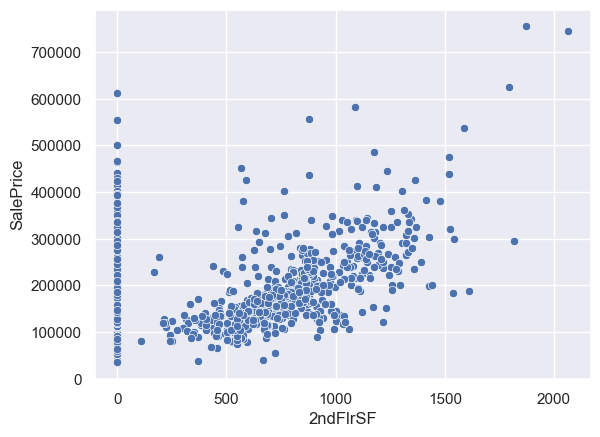

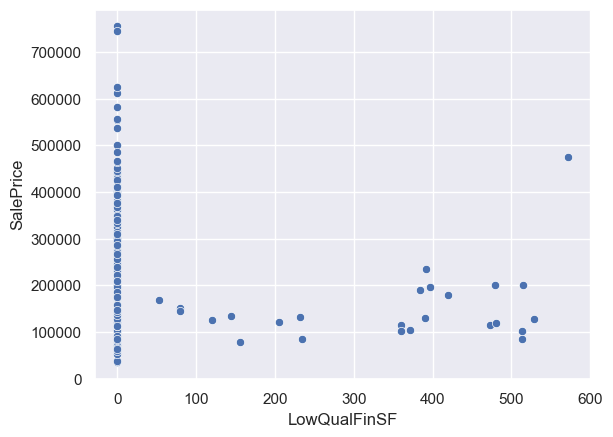

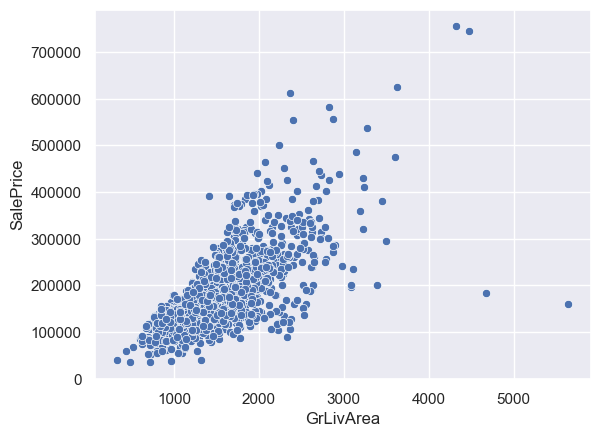

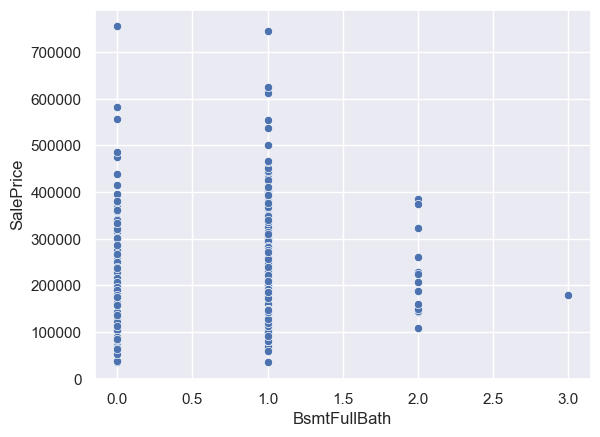

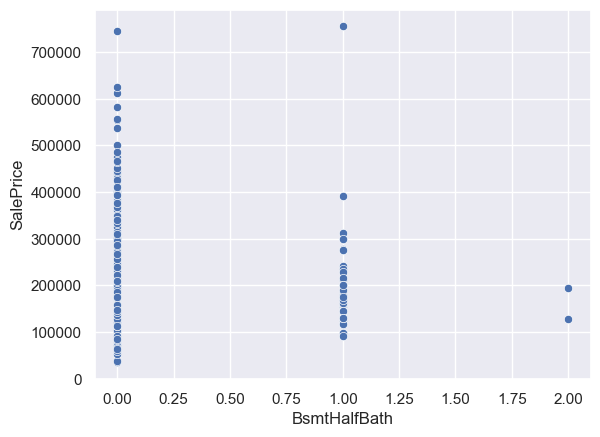

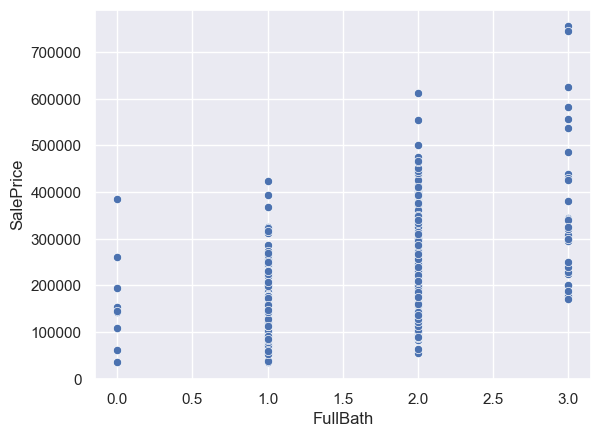

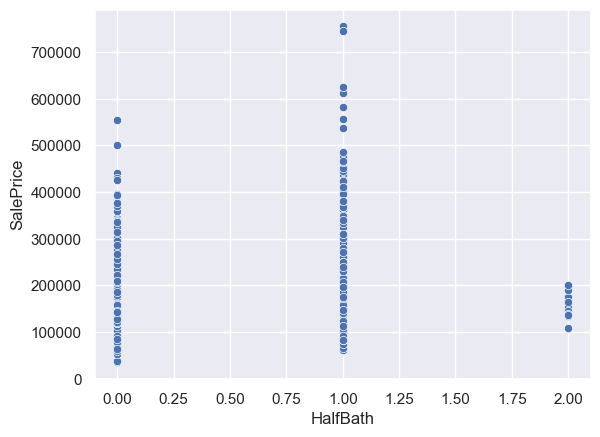

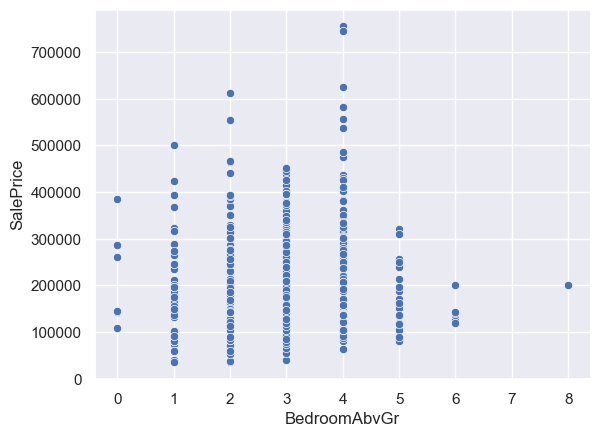

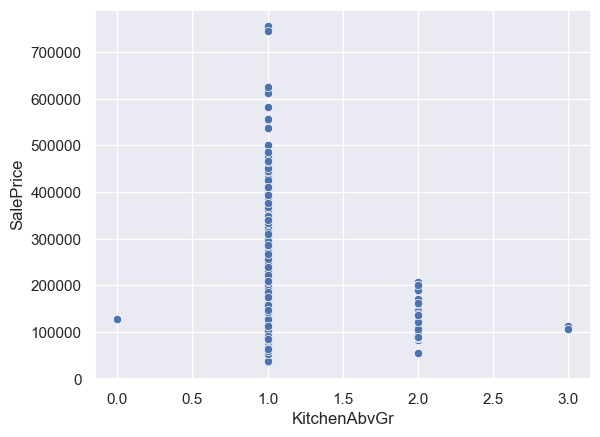

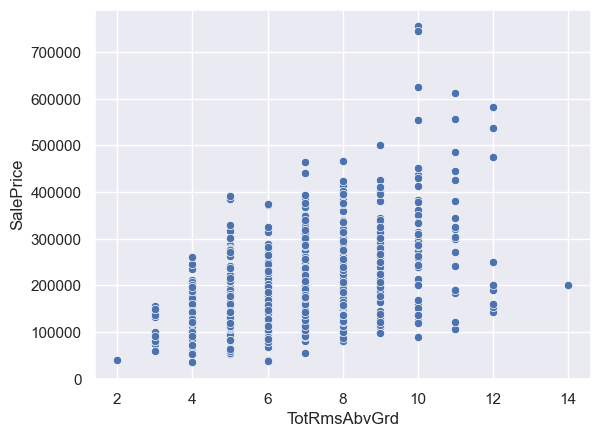

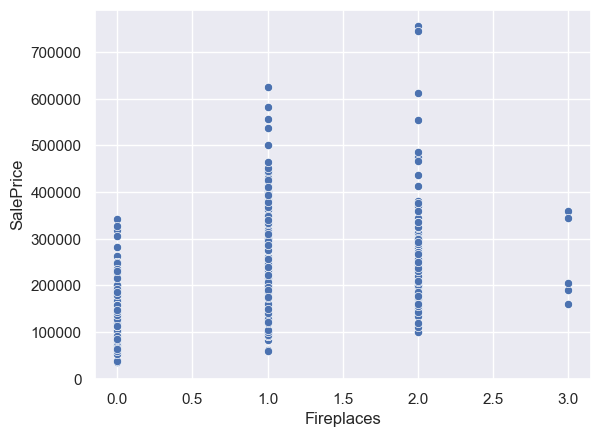

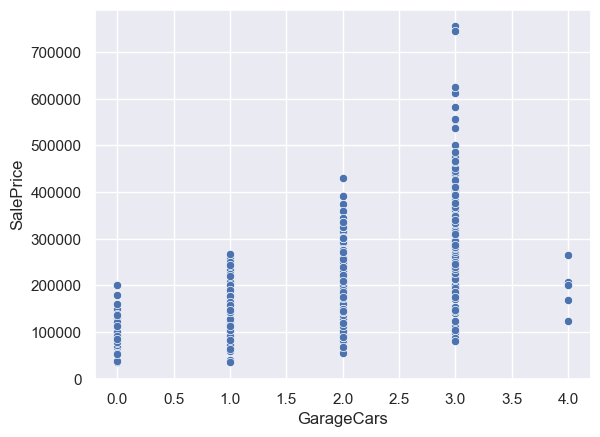

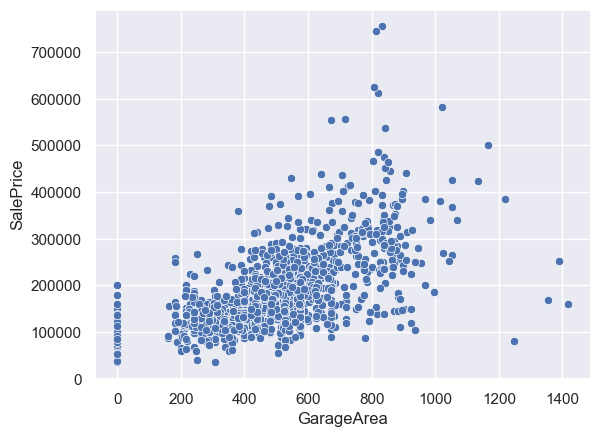

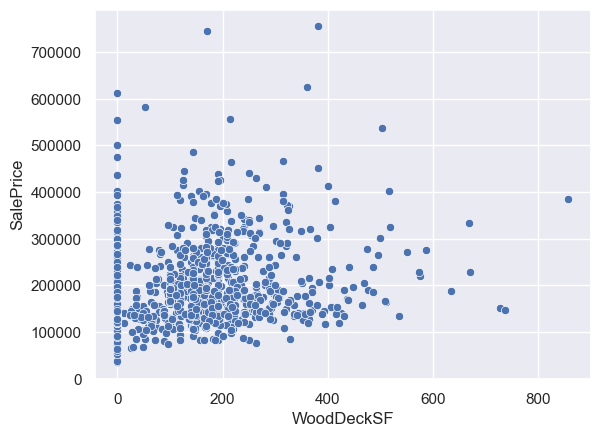

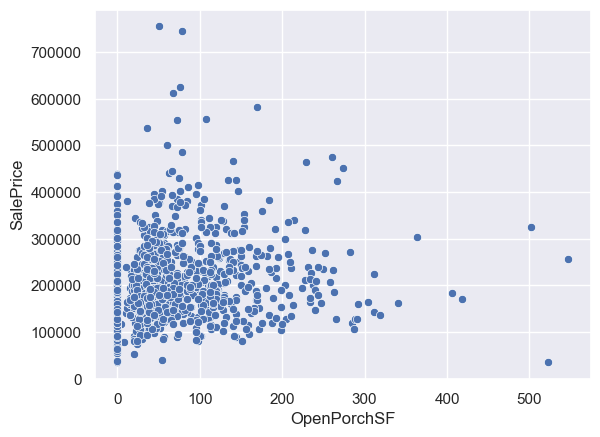

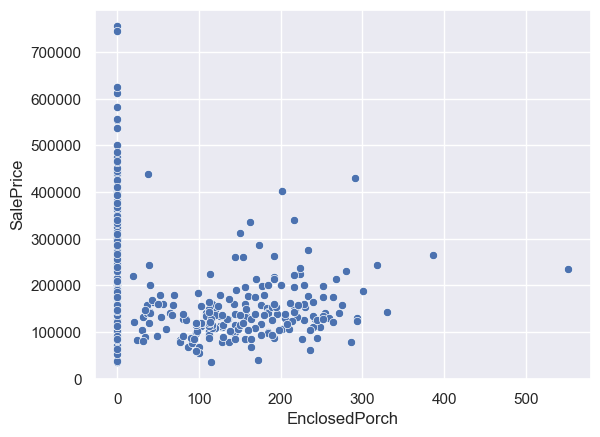

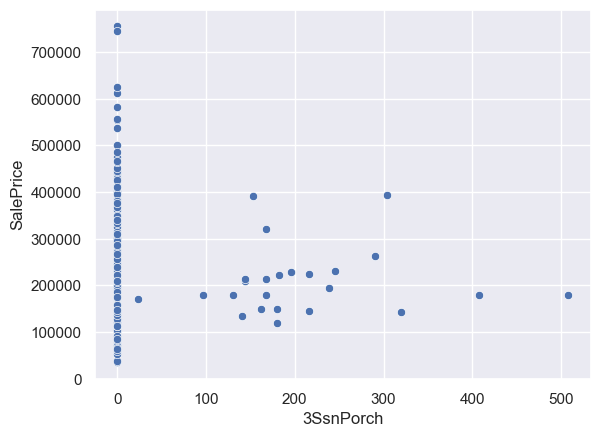

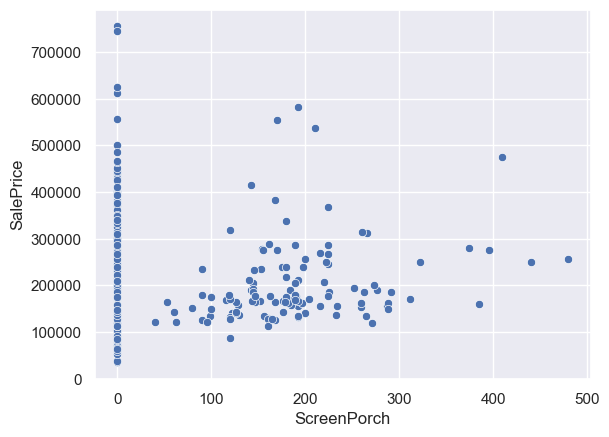

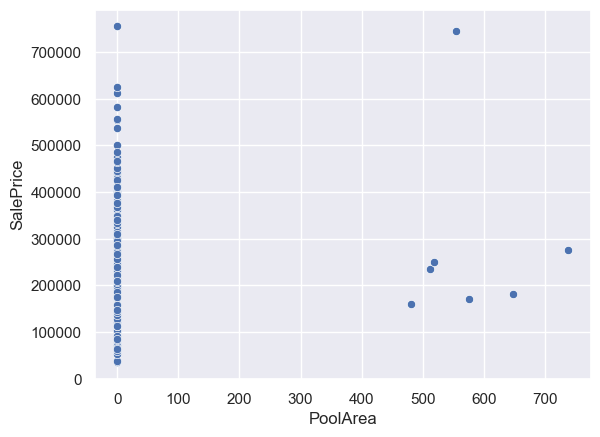

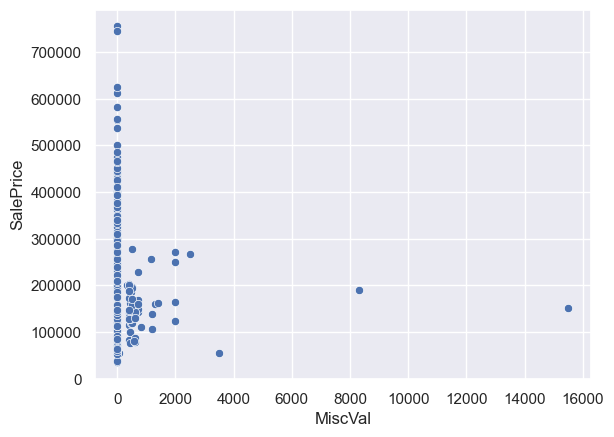

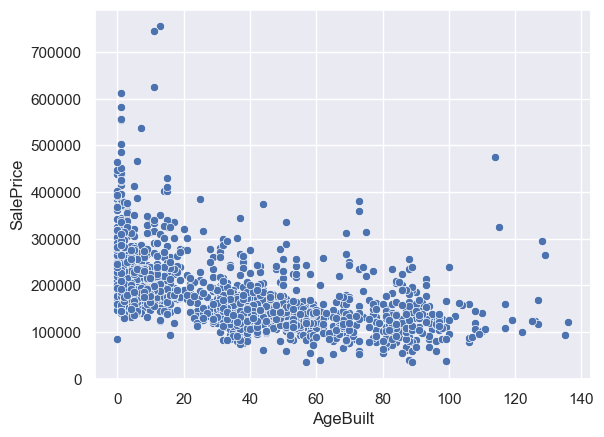

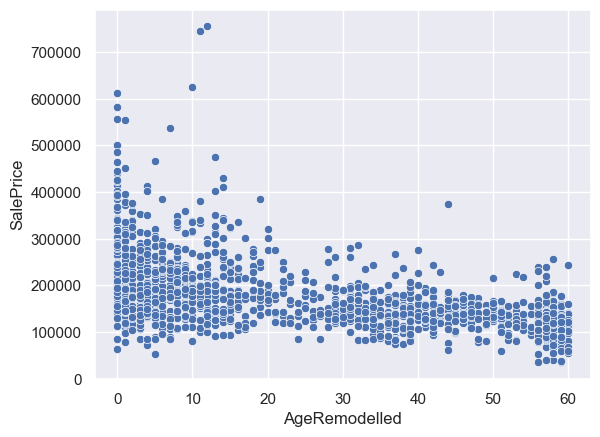

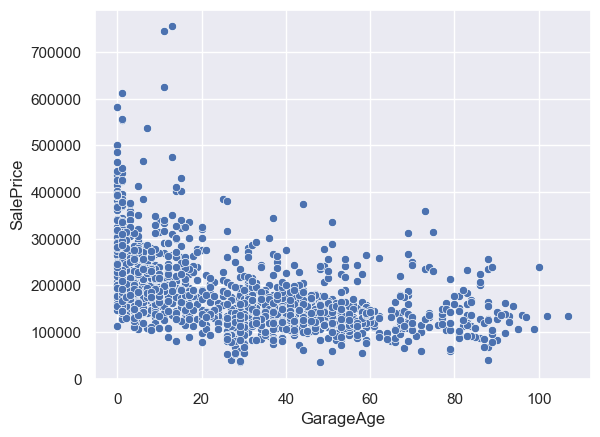

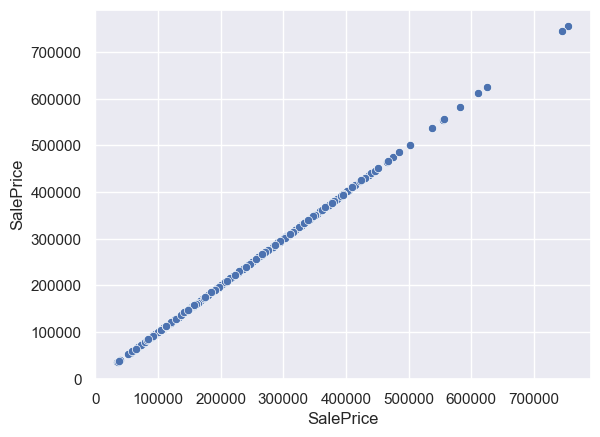

In [717]:
# chart all numerc variables against saleprice
for numvar in houses_numeric:
    sns.scatterplot(x=numvar,
                    y="SalePrice",
                    data=houses_numeric)
    plt.show()

In [718]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  RoofStyl

### After discovering a significant number of null values in these columns, we performed imputation on some of them. However, the imputed data revealed minimal variance, leading us to the decision of dropping these columns

In [719]:
houses = houses.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)
#Drop columns which have moe than 80% bias data
houses = houses.drop(['Street', 'LandContour', 'Utilities', 'LandSlope','BsmtCond', 'MoSold','CentralAir', 'Electrical', 'GarageQual'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'], axis = 1)

### The following derived independant variables are correlated hence drop them for avoiding multicollinearility

In [720]:
houses = houses.drop(['GarageCars'], axis = 1)
houses = houses.drop(['BsmtUnfSF'], axis = 1)
houses = houses.drop(['AgeRemodelled' , 'GarageAge'], axis = 1)
houses = houses.drop(['TotRmsAbvGrd'], axis = 1)

In [721]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   object 
 9   OverallCond    1460 non-null   object 
 10  RoofStyle      1460 non-null   object 
 11  Exterior1st    1460 non-null   object 
 12  Exterior2nd    1460 non-null   object 
 13  MasVnrType     1460 non-null   object 
 14  MasVnrArea     1460 non-null   float64
 15  ExterQual      1460 non-null   object 
 16  Foundation     1460 non-null   object 
 17  BsmtQual       1460 non-null   object 
 18  BsmtExpo

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [722]:
# split into X and y
X = houses.drop(['SalePrice'], axis=1)

X.head()

y = houses['SalePrice'] # response variable in Y


In [723]:
houses_categorical =  GetCategorical(X)
categorical_columns = list(houses_categorical.columns)
print(categorical_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'MiscFeature']


In [724]:
houses_numeric = GetNumerical(X)
numerical_columns = list(houses_numeric.columns)
print(numerical_columns)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'AgeBuilt']


### Creating Dummy columns for categorical variables

In [725]:
# convert into dummies - one hot encoding
houses_dummies = pd.get_dummies(houses_categorical, drop_first=True)
houses_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  GarageType_CarPort  GarageType_Detchd  GarageType_none  \
0  ...                   0                  0                0   
1  ...                   0                  0                0   
2  ...                   0                  0                0   
3  ...                   0                  1                0   
4  ...                   0                  0                0   

   GarageFinish_RFn  GarageFinish_Unf  GarageFinish_none  MiscFeature_Othr  \
0                 1                 0                  0                 0   
1                 1                 0                  0                 0   
2                 1                 0                  0                 0   
3                 0                 1                  0                 0   
4                 1                 0                  0                 0   

   MiscFeature_Shed  MiscFeature_TenC  MiscFeature_none  
0                 0                 0                 1  
1                 0                 0                 1  
2                 0                 0                 1  
3                 0                 0                 1  
4                 0                 0                 1  

[5 rows x 158 columns]

In [726]:
# drop categorical variables 
X = X.drop(list(houses_categorical.columns), axis=1)

In [727]:
# concat dummy variables with X
X = pd.concat([X, houses_dummies], axis=1)

In [728]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_none',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageFinish_none',
       'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC',
       'MiscFeature_none'],
      dtype='object', length=183)

In [729]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting house prices, a dataset using linear regression.

In [730]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [731]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

78050676050757.19
[-3.69579749e+03  4.41480420e+03  1.38738863e+03 -3.78969929e+03
 -4.49774159e+02  1.40977113e+03  4.69180842e+15  5.29791194e+15
  5.90112309e+14 -6.37747410e+15  4.81637500e+03  1.56587891e+03
  5.46450000e+03  2.54475000e+03 -1.52500000e+01 -3.30968750e+03
  1.09025000e+03  5.41626562e+03  1.24054688e+03 -1.10650000e+03
  8.96937500e+02  1.87362500e+03  1.87034375e+03 -1.49573438e+03
 -6.40350000e+03 -1.07025000e+03 -7.95375000e+02 -1.24768750e+03
  1.86593750e+03 -1.48900000e+03  5.10375000e+02  1.26371875e+03
  7.70875000e+02 -3.11500000e+02 -6.91312500e+02 -6.28000000e+03
 -4.15725000e+03 -2.01962500e+03 -3.37500000e+02  4.47425000e+03
  3.00387500e+03  1.11234375e+04  1.04775000e+04  6.55468750e+02
 -1.37881250e+03  1.24233594e+03  1.80062500e+03 -2.56306250e+03
 -7.59968750e+02 -4.63187500e+02 -9.04015625e+02 -7.32625000e+02
 -7.52437500e+02  9.76187500e+02  7.42187500e+02  4.70225000e+03
 -5.75850000e+03  1.75012500e+03 -1.99712500e+03 -2.35562500e+03
 -1.895

In [732]:
from sklearn.metrics import r2_score, mean_squared_error

In [733]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8933737994515198
-1.7489636360293725e+21
680349669832.488
4.9298257160030484e+33
666356189.8457278
1.125530985388824e+31


## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [734]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [735]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [736]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.89968611e+02  2.81014986e+03  3.19877375e+03  1.42767003e+03
  4.05601731e+02  3.91676643e+03  5.54033539e+03  4.69488120e+03
 -6.54192708e+02  7.91554954e+03  2.32619433e+03  4.83312305e+02
  4.84292506e+03  2.61122471e+03  1.26222685e+03 -1.99778526e+03
  2.94264099e+03  5.21592612e+03  1.89367075e+03  4.35051092e+02
  1.20316542e+02  1.17761700e+03  1.23460407e+03 -3.58852904e+02
 -2.99885688e+03 -1.32528627e+03  6.77703773e-01  7.96330796e-02
  1.98597180e+01  8.78882524e+02  7.51669373e+02  4.41151724e+02
 -6.73619635e+02 -3.42533334e+02 -9.34350587e+02 -2.45811662e+03
 -2.29889037e+03 -7.66689336e+02 -1.25164828e+03  9.08308724e+02
  4.26047072e+02  1.22770272e+03 -1.08530687e+03  5.30305911e+02
 -2.05713865e+03 -3.14728385e+02  1.82652543e+03 -1.34445572e+03
 -5.30084995e+02 -3.60612992e+02  2.95304767e+01 -3.14591689e+02
 -7.53678665e+01  6.69727714e+02 -8.51777094e+02  3.15136114e+03
 -3.72861984e+03 -6.41414053e+02 -1.03420919e+03 -1.50877976e+03
 -1.26239372e+03 -1.90179

In [737]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8630617609892418
0.85356832239339
873761657258.4485
412748804509.9699
855790065.875072
942348868.7442236


## Lasso

In [738]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [739]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [740]:
#Fitting LAsso model for alpha = 1000 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [741]:
lasso.coef_

array([   -0.        ,  3078.72744367,   728.46979351,     0.        ,
           0.        ,  1327.94570317,     0.        ,     0.        ,
       -1276.04766049, 24445.30610612,  3239.06418048,   368.75400783,
        3686.20703799,  1153.1058245 ,     0.        , -4220.80829498,
        1903.67695792,  5154.2653981 ,   647.4982428 ,    -0.        ,
           0.        ,   856.33445416,  1051.27159219,  -568.15062385,
       -8860.99812828,    -0.        ,     0.        ,     0.        ,
           0.        ,    -0.        ,     0.        ,    -0.        ,
          -0.        ,    -0.        ,    -0.        , -2143.87512903,
       -2606.55067795,   -31.94072981,    -0.        ,     0.        ,
           0.        ,   873.27115648,    -0.        ,    98.92221574,
       -1862.67769328,    -0.        ,  1743.52806759,  -274.14965205,
          -0.        ,    -0.        ,    -0.        ,    -0.        ,
           0.        ,   842.960453  ,     0.        ,  4969.31277277,
      

In [742]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8693258374034292
0.859249409864546
833792472402.6106
396735452069.0062
816642970.0319399
905788703.3538955


In [743]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.933738e-01      8.630618e-01      8.693258e-01
1   R2 Score (Test)      -1.748964e+21      8.535683e-01      8.592494e-01
2       RSS (Train)       6.803497e+11      8.737617e+11      8.337925e+11
3        RSS (Test)       4.929826e+33      4.127488e+11      3.967355e+11
4       MSE (Train)       2.581388e+04      2.925389e+04      2.857697e+04
5        MSE (Test)       3.354893e+15      3.069770e+04      3.009632e+04

## Lets observe the changes in the coefficients after regularization

In [744]:
betas = pd.DataFrame(index=X.columns)

In [745]:
betas.rows = X.columns

In [746]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [747]:
pd.set_option('display.max_rows', None)
betas.head(254)

Linear         Ridge         Lasso
LotFrontage          -3.695797e+03  3.899686e+02     -0.000000
LotArea               4.414804e+03  2.810150e+03   3078.727444
MasVnrArea            1.387389e+03  3.198774e+03    728.469794
BsmtFinSF1           -3.789699e+03  1.427670e+03      0.000000
BsmtFinSF2           -4.497742e+02  4.056017e+02      0.000000
TotalBsmtSF           1.409771e+03  3.916766e+03   1327.945703
1stFlrSF              4.691808e+15  5.540335e+03      0.000000
2ndFlrSF              5.297912e+15  4.694881e+03      0.000000
LowQualFinSF          5.901123e+14 -6.541927e+02  -1276.047660
GrLivArea            -6.377474e+15  7.915550e+03  24445.306106
BsmtFullBath          4.816375e+03  2.326194e+03   3239.064180
BsmtHalfBath          1.565879e+03  4.833123e+02    368.754008
FullBath              5.464500e+03  4.842925e+03   3686.207038
HalfBath              2.544750e+03  2.611225e+03   1153.105824
BedroomAbvGr         -1.525000e+01  1.262227e+03      0.000000
KitchenAbvGr         -3.309688e+03 -1.997785e+03  -4220.808295
Fireplaces            1.090250e+03  2.942641e+03   1903.676958
GarageArea            5.416266e+03  5.215926e+03   5154.265398
WoodDeckSF            1.240547e+03  1.893671e+03    647.498243
OpenPorchSF          -1.106500e+03  4.350511e+02     -0.000000
EnclosedPorch         8.969375e+02  1.203165e+02      0.000000
3SsnPorch             1.873625e+03  1.177617e+03    856.334454
ScreenPorch           1.870344e+03  1.234604e+03   1051.271592
PoolArea             -1.495734e+03 -3.588529e+02   -568.150624
AgeBuilt             -6.403500e+03 -2.998857e+03  -8860.998128
MSSubClass_30        -1.070250e+03 -1.325286e+03     -0.000000
MSSubClass_40        -7.953750e+02  6.777038e-01      0.000000
MSSubClass_45        -1.247688e+03  7.963308e-02      0.000000
MSSubClass_50         1.865938e+03  1.985972e+01      0.000000
MSSubClass_60        -1.489000e+03  8.788825e+02     -0.000000
MSSubClass_70         5.103750e+02  7.516694e+02      0.000000
MSSubClass_75         1.263719e+03  4.411517e+02     -0.000000
MSSubClass_80         7.708750e+02 -6.736196e+02     -0.000000
MSSubClass_85        -3.115000e+02 -3.425333e+02     -0.000000
MSSubClass_90        -6.913125e+02 -9.343506e+02     -0.000000
MSSubClass_120       -6.280000e+03 -2.458117e+03  -2143.875129
MSSubClass_160       -4.157250e+03 -2.298890e+03  -2606.550678
MSSubClass_180       -2.019625e+03 -7.666893e+02    -31.940730
MSSubClass_190       -3.375000e+02 -1.251648e+03     -0.000000
MSZoning_FV           4.474250e+03  9.083087e+02      0.000000
MSZoning_RH           3.003875e+03  4.260471e+02      0.000000
MSZoning_RL           1.112344e+04  1.227703e+03    873.271156
MSZoning_RM           1.047750e+04 -1.085307e+03     -0.000000
LotShape_IR2          6.554688e+02  5.303059e+02     98.922216
LotShape_IR3         -1.378812e+03 -2.057139e+03  -1862.677693
LotShape_Reg          1.242336e+03 -3.147284e+02     -0.000000
LotConfig_CulDSac     1.800625e+03  1.826525e+03   1743.528068
LotConfig_FR2        -2.563062e+03 -1.344456e+03   -274.149652
LotConfig_FR3        -7.599688e+02 -5.300850e+02     -0.000000
LotConfig_Inside     -4.631875e+02 -3.606130e+02     -0.000000
Neighborhood_Blueste -9.040156e+02  2.953048e+01     -0.000000
Neighborhood_BrDale  -7.326250e+02 -3.145917e+02     -0.000000
Neighborhood_BrkSide -7.524375e+02 -7.536787e+01      0.000000
Neighborhood_ClearCr  9.761875e+02  6.697277e+02    842.960453
Neighborhood_CollgCr  7.421875e+02 -8.517771e+02      0.000000
Neighborhood_Crawfor  4.702250e+03  3.151361e+03   4969.312773
Neighborhood_Edwards -5.758500e+03 -3.728620e+03  -3789.420387
Neighborhood_Gilbert  1.750125e+03 -6.414141e+02      0.000000
Neighborhood_IDOTRR  -1.997125e+03 -1.034209e+03   -283.106231
Neighborhood_MeadowV -2.355625e+03 -1.508780e+03   -786.618208
Neighborhood_Mitchel -1.895000e+03 -1.262394e+03     -0.000000
Neighborhood_NAmes   -3.006250e+03 -1.901798e+03   -228.884729
Neighborhood_NPkVill  3.811250e+02  1.797799e+02      0.000

In [748]:
#intercepts

intercepts = pd.DataFrame({'Linear':lm.intercept_, 'Ridge' :  ridge.intercept_ ,'Lasso' : lasso.intercept_}, index=[0] )
intercepts

Linear          Ridge          Lasso
0  7.805068e+13  180426.922926  180338.268729

In [749]:
lassononzero = betas[betas['Lasso'] != 0] 
lassononzero['Lasso'].info()

<class 'pandas.core.series.Series'>
Index: 79 entries, LotArea to GarageFinish_Unf
Series name: Lasso
Non-Null Count  Dtype  
--------------  -----  
79 non-null     float64
dtypes: float64(1)
memory usage: 1.2+ KB


In [750]:
print(lassononzero['Lasso'].sort_values(ascending=False))

GrLivArea               24445.306106
OverallQual_9           14978.691028
OverallQual_10          11047.635157
OverallQual_8           10845.481112
Neighborhood_NoRidge     7216.483229
Neighborhood_NridgHt     6233.228856
GarageArea               5154.265398
Neighborhood_Crawfor     4969.312773
BsmtExposure_Gd          4415.364281
OverallQual_7            4032.076770
Neighborhood_Somerst     3796.593404
FullBath                 3686.207038
BsmtFullBath             3239.064180
LotArea                  3078.727444
HouseStyle_1Story        3015.989285
BsmtFinType1_GLQ         2963.979373
Exterior1st_BrkFace      2627.209994
Exterior2nd_VinylSd      2237.561059
Fireplaces               1903.676958
LotConfig_CulDSac        1743.528068
OverallCond_7            1531.251570
OverallCond_9            1420.061943
GarageType_Attchd        1360.767516
TotalBsmtSF              1327.945703
Neighborhood_StoneBr     1213.302569
HalfBath                 1153.105824
ScreenPorch              1051.271592
O

# PART 1 CONCLUSON

## Lasso model results would be utilized to predict the house sales.

### ALPHA

- RIDGE : 500
- LASSO : 1000

### TOP 10 PREDICTORS with their coefficients:

- GrLivArea               24445.306106
- OverallQual_9           14978.691028
- OverallQual_10          11047.635157
- OverallQual_8           10845.481112
- AgeBuilt                -8860.998128
- Neighborhood_NoRidge     7216.483229
- Neighborhood_NridgHt     6233.228856
- GarageArea               5154.265398
- Neighborhood_Crawfor     4969.312773
- BsmtExposure_Gd          4415.364281


# PART 2 ASSIGNMENT

## Que1: What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Ridge alpha after doubling : 1000
### Lasso alpha after doubling : 2000

In [751]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.12706029e+03  2.42149500e+03  3.26979915e+03  1.98696303e+03
  3.65466498e+02  4.10655161e+03  5.17231276e+03  3.64224040e+03
 -4.61696493e+02  6.78816032e+03  1.89444724e+03  3.18070093e+02
  4.10328565e+03  2.29635584e+03  1.29226978e+03 -1.53974469e+03
  3.00039200e+03  4.76636822e+03  2.05374351e+03  9.00342852e+02
 -1.82737540e+01  9.49994712e+02  1.04482186e+03 -2.75268971e+01
 -2.43619508e+03 -1.29919555e+03  6.20863664e+01 -1.45280000e+01
 -1.53749620e+01  1.33044915e+03  7.38543277e+02  3.41084678e+02
 -6.30745295e+02 -3.46142211e+02 -8.59818353e+02 -1.59540599e+03
 -1.71079650e+03 -6.61224993e+02 -1.03657555e+03  7.61550810e+02
  2.29716987e+02  1.15631065e+03 -1.26009695e+03  5.43046574e+02
 -1.65307821e+03 -7.39258152e+02  1.58211940e+03 -9.63640684e+02
 -4.03771431e+02 -3.39320942e+02  4.75723949e+01 -3.59806887e+02
 -1.09748528e+02  5.90392737e+02 -8.33281221e+02  2.40880971e+03
 -2.87324379e+03 -7.62163719e+02 -8.92537523e+02 -1.18905629e+03
 -9.50998960e+02 -1.56715

In [752]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8419925378851314
0.8350442543273294
1008198023824.7605
464962827280.83704
987461335.7735167
1061558966.3946052


In [753]:
#Fitting LAsso model for alpha = 1000 and printing coefficients which have been penalised

alpha =2000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=2000)

In [754]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8472154387131126
0.8436382158662223
974872266781.8728
440738920205.8108
954821025.2515894
1006253242.4790201


In [755]:
print(lasso.coef_)

[   -0.          2371.38937286   601.46733067     0.
     0.          3907.31725257     0.             0.
  -794.68091937 24032.36020346  2445.6195775      0.
  2239.1350681      0.             0.         -4284.82769564
  2900.31835846  6703.47720544   390.27621628     0.
    -0.           215.05239818   159.86362897    -0.
 -7998.02763906    -0.             0.             0.
    -0.             0.             0.            -0.
    -0.            -0.            -0.           -32.03511271
 -1328.45052881    -0.            -0.             0.
    -0.             0.         -1379.73705741     0.
 -1215.90504195    -0.          1599.38554903    -0.
    -0.            -0.            -0.            -0.
     0.             0.             0.          3983.98667883
 -3168.22440692     0.            -0.            -0.
    -0.            -0.            -0.             0.
  6285.5431601   5164.88193966    -0.            -0.
    -0.            -0.          1746.17793239     0.
     0.           269.

In [756]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.933738e-01      8.419925e-01      8.472154e-01
1   R2 Score (Test)      -1.748964e+21      8.350443e-01      8.436382e-01
2       RSS (Train)       6.803497e+11      1.008198e+12      9.748723e+11
3        RSS (Test)       4.929826e+33      4.649628e+11      4.407389e+11
4       MSE (Train)       2.581388e+04      3.142390e+04      3.090018e+04
5        MSE (Test)       3.354893e+15      3.258157e+04      3.172149e+04

In [757]:
betas = pd.DataFrame(index=X.columns)

In [758]:
betas.rows = X.columns

In [759]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [760]:
pd.set_option('display.max_rows', None)
betas.head(254)

Linear         Ridge         Lasso
LotFrontage          -3.695797e+03  1.127060e+03     -0.000000
LotArea               4.414804e+03  2.421495e+03   2371.389373
MasVnrArea            1.387389e+03  3.269799e+03    601.467331
BsmtFinSF1           -3.789699e+03  1.986963e+03      0.000000
BsmtFinSF2           -4.497742e+02  3.654665e+02      0.000000
TotalBsmtSF           1.409771e+03  4.106552e+03   3907.317253
1stFlrSF              4.691808e+15  5.172313e+03      0.000000
2ndFlrSF              5.297912e+15  3.642240e+03      0.000000
LowQualFinSF          5.901123e+14 -4.616965e+02   -794.680919
GrLivArea            -6.377474e+15  6.788160e+03  24032.360203
BsmtFullBath          4.816375e+03  1.894447e+03   2445.619577
BsmtHalfBath          1.565879e+03  3.180701e+02      0.000000
FullBath              5.464500e+03  4.103286e+03   2239.135068
HalfBath              2.544750e+03  2.296356e+03      0.000000
BedroomAbvGr         -1.525000e+01  1.292270e+03      0.000000
KitchenAbvGr         -3.309688e+03 -1.539745e+03  -4284.827696
Fireplaces            1.090250e+03  3.000392e+03   2900.318358
GarageArea            5.416266e+03  4.766368e+03   6703.477205
WoodDeckSF            1.240547e+03  2.053744e+03    390.276216
OpenPorchSF          -1.106500e+03  9.003429e+02      0.000000
EnclosedPorch         8.969375e+02 -1.827375e+01     -0.000000
3SsnPorch             1.873625e+03  9.499947e+02    215.052398
ScreenPorch           1.870344e+03  1.044822e+03    159.863629
PoolArea             -1.495734e+03 -2.752690e+01     -0.000000
AgeBuilt             -6.403500e+03 -2.436195e+03  -7998.027639
MSSubClass_30        -1.070250e+03 -1.299196e+03     -0.000000
MSSubClass_40        -7.953750e+02  6.208637e+01      0.000000
MSSubClass_45        -1.247688e+03 -1.452800e+01      0.000000
MSSubClass_50         1.865938e+03 -1.537496e+01     -0.000000
MSSubClass_60        -1.489000e+03  1.330449e+03      0.000000
MSSubClass_70         5.103750e+02  7.385433e+02      0.000000
MSSubClass_75         1.263719e+03  3.410847e+02     -0.000000
MSSubClass_80         7.708750e+02 -6.307453e+02     -0.000000
MSSubClass_85        -3.115000e+02 -3.461422e+02     -0.000000
MSSubClass_90        -6.913125e+02 -8.598184e+02     -0.000000
MSSubClass_120       -6.280000e+03 -1.595406e+03    -32.035113
MSSubClass_160       -4.157250e+03 -1.710796e+03  -1328.450529
MSSubClass_180       -2.019625e+03 -6.612250e+02     -0.000000
MSSubClass_190       -3.375000e+02 -1.036576e+03     -0.000000
MSZoning_FV           4.474250e+03  7.615508e+02      0.000000
MSZoning_RH           3.003875e+03  2.297170e+02     -0.000000
MSZoning_RL           1.112344e+04  1.156311e+03      0.000000
MSZoning_RM           1.047750e+04 -1.260097e+03  -1379.737057
LotShape_IR2          6.554688e+02  5.430466e+02      0.000000
LotShape_IR3         -1.378812e+03 -1.653078e+03  -1215.905042
LotShape_Reg          1.242336e+03 -7.392582e+02     -0.000000
LotConfig_CulDSac     1.800625e+03  1.582119e+03   1599.385549
LotConfig_FR2        -2.563062e+03 -9.636407e+02     -0.000000
LotConfig_FR3        -7.599688e+02 -4.037714e+02     -0.000000
LotConfig_Inside     -4.631875e+02 -3.393209e+02     -0.000000
Neighborhood_Blueste -9.040156e+02  4.757239e+01     -0.000000
Neighborhood_BrDale  -7.326250e+02 -3.598069e+02     -0.000000
Neighborhood_BrkSide -7.524375e+02 -1.097485e+02      0.000000
Neighborhood_ClearCr  9.761875e+02  5.903927e+02      0.000000
Neighborhood_CollgCr  7.421875e+02 -8.332812e+02      0.000000
Neighborhood_Crawfor  4.702250e+03  2.408810e+03   3983.986679
Neighborhood_Edwards -5.758500e+03 -2.873244e+03  -3168.224407
Neighborhood_Gilbert  1.750125e+03 -7.621637e+02      0.000000
Neighborhood_IDOTRR  -1.997125e+03 -8.925375e+02     -0.000000
Neighborhood_MeadowV -2.355625e+03 -1.189056e+03     -0.000000
Neighborhood_Mitchel -1.895000e+03 -9.509990e+02     -0.000000
Neighborhood_NAmes   -3.006250e+03 -1.567158e+03     -0.000000
Neighborhood_NPkVill  3.811250e+02  3.219775e+01     -0.000

In [761]:
#intercepts

intercepts = pd.DataFrame({'Linear':lm.intercept_, 'Ridge' :  ridge.intercept_ ,'Lasso' : lasso.intercept_}, index=[0] )
intercepts

Linear          Ridge          Lasso
0  7.805068e+13  180460.463851  180244.446228

In [762]:
lassononzero = betas[betas['Lasso'] != 0] 
lassononzero['Lasso'].info()

<class 'pandas.core.series.Series'>
Index: 52 entries, LotArea to GarageFinish_Unf
Series name: Lasso
Non-Null Count  Dtype  
--------------  -----  
52 non-null     float64
dtypes: float64(1)
memory usage: 832.0+ bytes


In [763]:
print(lassononzero['Lasso'].sort_values(ascending=False))

GrLivArea               24032.360203
OverallQual_9           14281.982795
OverallQual_10          10327.892828
OverallQual_8            9782.560054
GarageArea               6703.477205
Neighborhood_NoRidge     6285.543160
Neighborhood_NridgHt     5164.881940
BsmtExposure_Gd          4512.558371
Neighborhood_Crawfor     3983.986679
TotalBsmtSF              3907.317253
BsmtFinType1_GLQ         2934.618255
Fireplaces               2900.318358
BsmtFullBath             2445.619577
LotArea                  2371.389373
FullBath                 2239.135068
OverallQual_7            2197.479399
GarageType_Attchd        1857.290047
Neighborhood_Somerst     1746.177932
LotConfig_CulDSac        1599.385549
Exterior1st_BrkFace      1443.202534
Exterior2nd_VinylSd      1363.262003
OverallCond_7            1153.300132
MasVnrArea                601.467331
WoodDeckSF                390.276216
OverallCond_9             370.417342
Neighborhood_Veenker      269.968551
3SsnPorch                 215.052398
S

# Question1 Answer 

## Ridge

As the alpha is doubled the 
 - R2 score decreases for both train and test data
 - Coefficient values decreases as well
 

## Lasso

As the alpha is doubled the 
 - R2 score decreases for both train and test data
 - More features are removed from the model.
 - Coefficient values decreases as well
 
## Top 5 predictor variables:
-	GrLivArea 
-	OverallQual_9
-	OverallQual_10
-	OverallQual_8
-	AgeBuilt                


## Ques 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Variables to remove :

-	GrLivArea 
-	OverallQual_9
-	OverallQual_10
-	OverallQual_8
-	AgeBuilt                


In [765]:
removableVar = ["GrLivArea", "OverallQual_9", "OverallQual_10", "OverallQual_8", "AgeBuilt"]
X_train_new = X_train.drop(removableVar, axis=1)
X_test_new = X_test.drop(removableVar, axis=1)

In [766]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [767]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [771]:
#Fitting LAsso model for alpha = 1000 and printing coefficients which have been penalised

alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [778]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.877040947675306
0.8551899781491062
784564677553.0127
408177823111.41785
768427695.9383082
931912838.1539221


In [779]:
print(lasso.coef_)

[-1.03209593e+03  3.39556449e+03  2.10780157e+03 -0.00000000e+00
  0.00000000e+00  3.80486725e+03  1.47027707e+04  2.17246580e+04
 -0.00000000e+00  2.85992888e+03  2.92868810e+02  5.84324127e+03
  2.13353953e+03 -0.00000000e+00 -4.67899201e+03  2.80372377e+03
  5.63851740e+03  1.73454319e+03 -3.62445979e+02 -0.00000000e+00
  1.02474068e+03  9.63041248e+02 -2.69401162e+01 -1.64215922e+03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -4.07559517e+03 -3.24391131e+03 -6.41542112e+02
 -7.80644265e+02  0.00000000e+00  8.79038611e+01  7.44257049e+02
 -0.00000000e+00  1.72068953e+02 -2.16849495e+03  0.00000000e+00
  2.02589798e+03 -1.50829445e+03 -3.48174578e+02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  3.62160691e+01
  8.22299918e+01  4.02690476e+03 -5.20290093e+03  5.19355853e+02
 -1.47616365e+03 -1.12268945e+03 -1.23522996e+03 -1.67096077e+03
  1.85733781e+02 -0.00000

In [780]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.933738e-01      8.419925e-01      8.770409e-01
1   R2 Score (Test)      -1.748964e+21      8.350443e-01      8.551900e-01
2       RSS (Train)       6.803497e+11      1.008198e+12      7.845647e+11
3        RSS (Test)       4.929826e+33      4.649628e+11      4.081778e+11
4       MSE (Train)       2.581388e+04      3.142390e+04      2.772053e+04
5        MSE (Test)       3.354893e+15      3.258157e+04      3.052725e+04

In [781]:
betas = pd.DataFrame(index=X_train_new.columns)

In [782]:
betas.rows = X_train_new.columns

In [783]:
betas['Lasso'] = lasso.coef_

In [784]:
pd.set_option('display.max_rows', None)
betas.head(254)

Lasso
LotFrontage           -1032.095928
LotArea                3395.564491
MasVnrArea             2107.801573
BsmtFinSF1               -0.000000
BsmtFinSF2                0.000000
TotalBsmtSF            3804.867252
1stFlrSF              14702.770678
2ndFlrSF              21724.658045
LowQualFinSF             -0.000000
BsmtFullBath           2859.928884
BsmtHalfBath            292.868810
FullBath               5843.241271
HalfBath               2133.539528
BedroomAbvGr             -0.000000
KitchenAbvGr          -4678.992010
Fireplaces             2803.723769
GarageArea             5638.517399
WoodDeckSF             1734.543191
OpenPorchSF            -362.445979
EnclosedPorch            -0.000000
3SsnPorch              1024.740684
ScreenPorch             963.041248
PoolArea                -26.940116
MSSubClass_30         -1642.159223
MSSubClass_40            -0.000000
MSSubClass_45             0.000000
MSSubClass_50             0.000000
MSSubClass_60             0.000000
MSSubClass_70            -0.000000
MSSubClass_75             0.000000
MSSubClass_80            -0.000000
MSSubClass_85             0.000000
MSSubClass_90            -0.000000
MSSubClass_120        -4075.595170
MSSubClass_160        -3243.911311
MSSubClass_180         -641.542112
MSSubClass_190         -780.644265
MSZoning_FV               0.000000
MSZoning_RH              87.903861
MSZoning_RL             744.257049
MSZoning_RM              -0.000000
LotShape_IR2            172.068953
LotShape_IR3          -2168.494952
LotShape_Reg              0.000000
LotConfig_CulDSac      2025.897978
LotConfig_FR2         -1508.294453
LotConfig_FR3          -348.174578
LotConfig_Inside         -0.000000
Neighborhood_Blueste     -0.000000
Neighborhood_BrDale       0.000000
Neighborhood_BrkSide     -0.000000
Neighborhood_ClearCr     36.216069
Neighborhood_CollgCr     82.229992
Neighborhood_Crawfor   4026.904759
Neighborhood_Edwards  -5202.900934
Neighborhood_Gilbert    519.355853
Neighborhood_IDOTRR   -1476.163651
Neighborhood_MeadowV  -1122.689453
Neighborhood_Mitchel  -1235.229958
Neighborhood_NAmes    -1670.960769
Neighborhood_NPkVill    185.733781
Neighborhood_NWAmes      -0.000000
Neighborhood_NoRidge   8942.111840
Neighborhood_NridgHt   8478.939217
Neighborhood_OldTown  -3110.832440
Neighborhood_SWISU     -384.127013
Neighborhood_Sawyer   -1229.977983
Neighborhood_SawyerW    202.794132
Neighborhood_Somerst   5529.382636
Neighborhood_StoneBr   3729.544203
Neighborhood_Timber       0.000000
Neighborhood_Veenker   1477.456666
HouseStyle_1.5Unf       353.594603
HouseStyle_1Story      6198.333752
HouseStyle_2.5Fin      -512.294868
HouseStyle_2.5Unf        -0.000000
HouseStyle_2Story     -1262.330984
HouseStyle_SFoyer         0.000000
HouseStyle_SLvl          -0.000000
OverallQual_2         -1573.260108
OverallQual_3         -2553.232220
OverallQual_4         -6062.723801
OverallQual_5        -10192.728370
OverallQual_6         -9158.828222
OverallQual_7         -4916.500625
OverallCond_2            12.125024
OverallCond_3         -2082.073619
OverallCond_4         -2039.847576
OverallCond_5         -2904.814719
OverallCond_6             0.000000
OverallCond_7          1200.986042
OverallCond_8           514.159279
OverallCond_9          2510.888073
RoofStyle_Gable        -604.115416
RoofStyle_Gambrel         0.000000
RoofStyle_Hip             0.000000
RoofStyle_Mansard         0.000000
RoofStyle_Shed            0.000000
Exterior1st_AsphShn       0.000000
Exterior1st_BrkComm    -222.132857
Exterior1st_BrkFace    2939.277168
Exterior1st_CBlock       -0.000000
Exterior1st_CemntBd       0.000000
Exterior1st_HdBoard      -0.000000
Exterior1st_ImStucc    -662.283057
Exterior1st_MetalSd      -0.000000
Exterior1st_Plywood    -237.476901
Exterior1st_Stone         0.000000
Exterior1st_Stucco       -0.000000
Exterior1st_VinylSd       0.000000
Exterior1st_Wd Sdng      -0.000000
Exterior1st_WdShing     115.144462
Exterior2nd_AsphShn       0.000000
Exterior2nd_Brk Cmn       0.000000
Exte

In [785]:
 lasso.coef_

array([-1.03209593e+03,  3.39556449e+03,  2.10780157e+03, -0.00000000e+00,
        0.00000000e+00,  3.80486725e+03,  1.47027707e+04,  2.17246580e+04,
       -0.00000000e+00,  2.85992888e+03,  2.92868810e+02,  5.84324127e+03,
        2.13353953e+03, -0.00000000e+00, -4.67899201e+03,  2.80372377e+03,
        5.63851740e+03,  1.73454319e+03, -3.62445979e+02, -0.00000000e+00,
        1.02474068e+03,  9.63041248e+02, -2.69401162e+01, -1.64215922e+03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -4.07559517e+03, -3.24391131e+03, -6.41542112e+02,
       -7.80644265e+02,  0.00000000e+00,  8.79038611e+01,  7.44257049e+02,
       -0.00000000e+00,  1.72068953e+02, -2.16849495e+03,  0.00000000e+00,
        2.02589798e+03, -1.50829445e+03, -3.48174578e+02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.62160691e+01,
        8.22299918e+01,  

In [786]:
#intercepts

intercepts = pd.DataFrame({'Linear':lm.intercept_, 'Ridge' :  ridge.intercept_ ,'Lasso' : lasso.intercept_}, index=[0] )
intercepts

Linear          Ridge          Lasso
0  7.805068e+13  180460.463851  180407.115138

In [787]:
lassononzero = betas[betas['Lasso'] != 0] 
lassononzero['Lasso'].info()

<class 'pandas.core.series.Series'>
Index: 107 entries, LotFrontage to GarageFinish_Unf
Series name: Lasso
Non-Null Count  Dtype  
--------------  -----  
107 non-null    float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [788]:
print(lassononzero['Lasso'].sort_values(ascending=False))

2ndFlrSF                21724.658045
1stFlrSF                14702.770678
Neighborhood_NoRidge     8942.111840
Neighborhood_NridgHt     8478.939217
HouseStyle_1Story        6198.333752
FullBath                 5843.241271
GarageArea               5638.517399
Neighborhood_Somerst     5529.382636
BsmtExposure_Gd          5528.677247
Neighborhood_Crawfor     4026.904759
TotalBsmtSF              3804.867252
Neighborhood_StoneBr     3729.544203
LotArea                  3395.564491
BsmtFinType1_GLQ         3062.389900
Exterior2nd_VinylSd      3003.248345
Exterior1st_BrkFace      2939.277168
BsmtFullBath             2859.928884
Fireplaces               2803.723769
OverallCond_9            2510.888073
HalfBath                 2133.539528
MasVnrArea               2107.801573
LotConfig_CulDSac        2025.897978
Exterior2nd_ImStucc      1986.802270
WoodDeckSF               1734.543191
GarageType_Attchd        1629.142749
Neighborhood_Veenker     1477.456666
OverallCond_7            1200.986042
3

# PART 2 ASSIGNMENT  CONCLUSION

### NOTE:  FOR ```PART 1 ASSIGNMENT RESULTS```.  PLEASE SCROLL ABOVE PART 2 ASSIGNMENT SECTION IN CURRENT NOTEBOOK